# 입문자를 위한, 파이썬/R 데이터 분석 

]

## Today's mission

- 머신러닝 데이터 분석 핵심 내용 요약
- 분류(Classification) vs 회귀(Regression)
- (예제) 화씨 온도 구하기
- Linear Regression(경사하강법)
- Logistic Regression(로지스틱 회귀)

]

## 분류(Classification) vs 회귀(Regression)

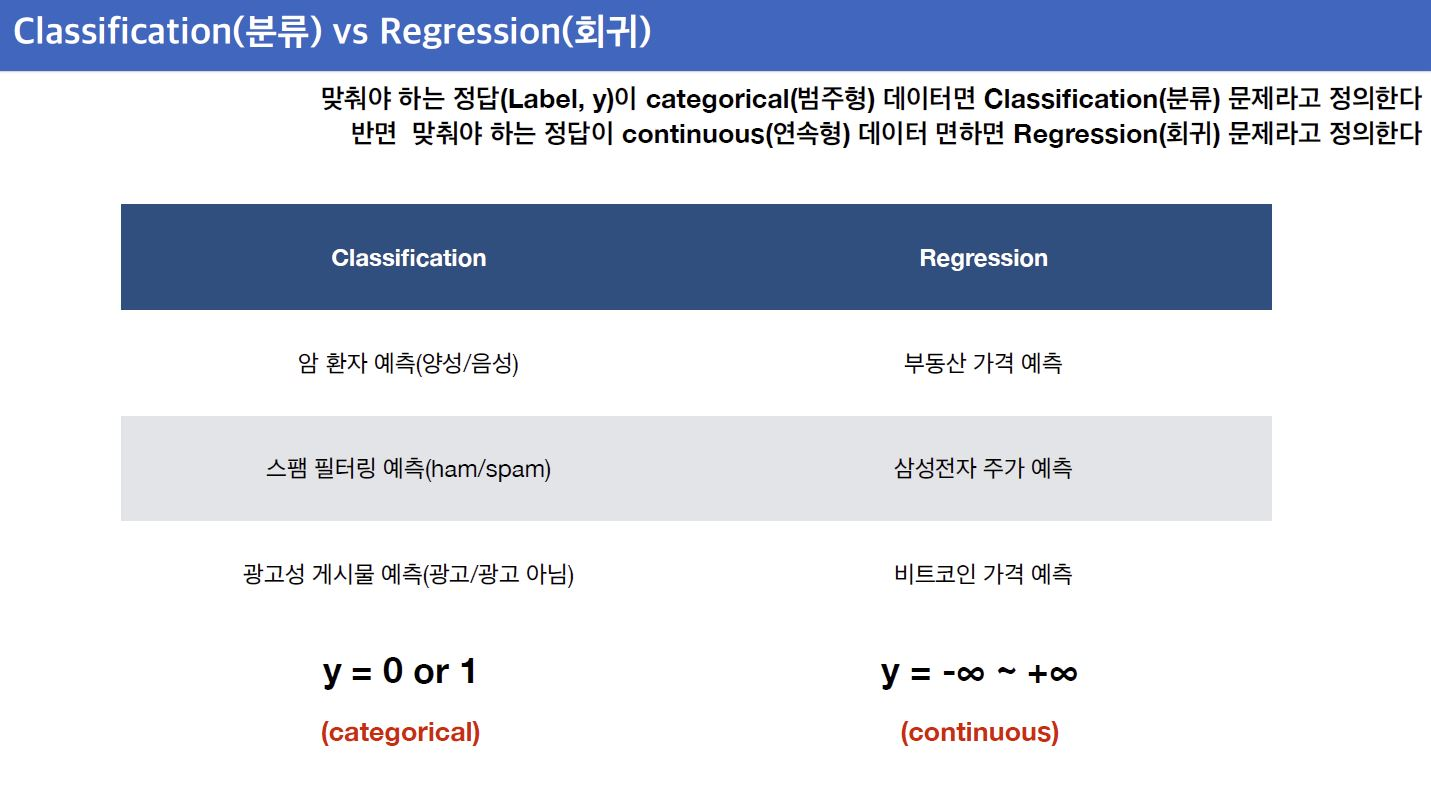

## Linear Regression(경사하강법)

참고 : https://gooopy.tistory.com/129

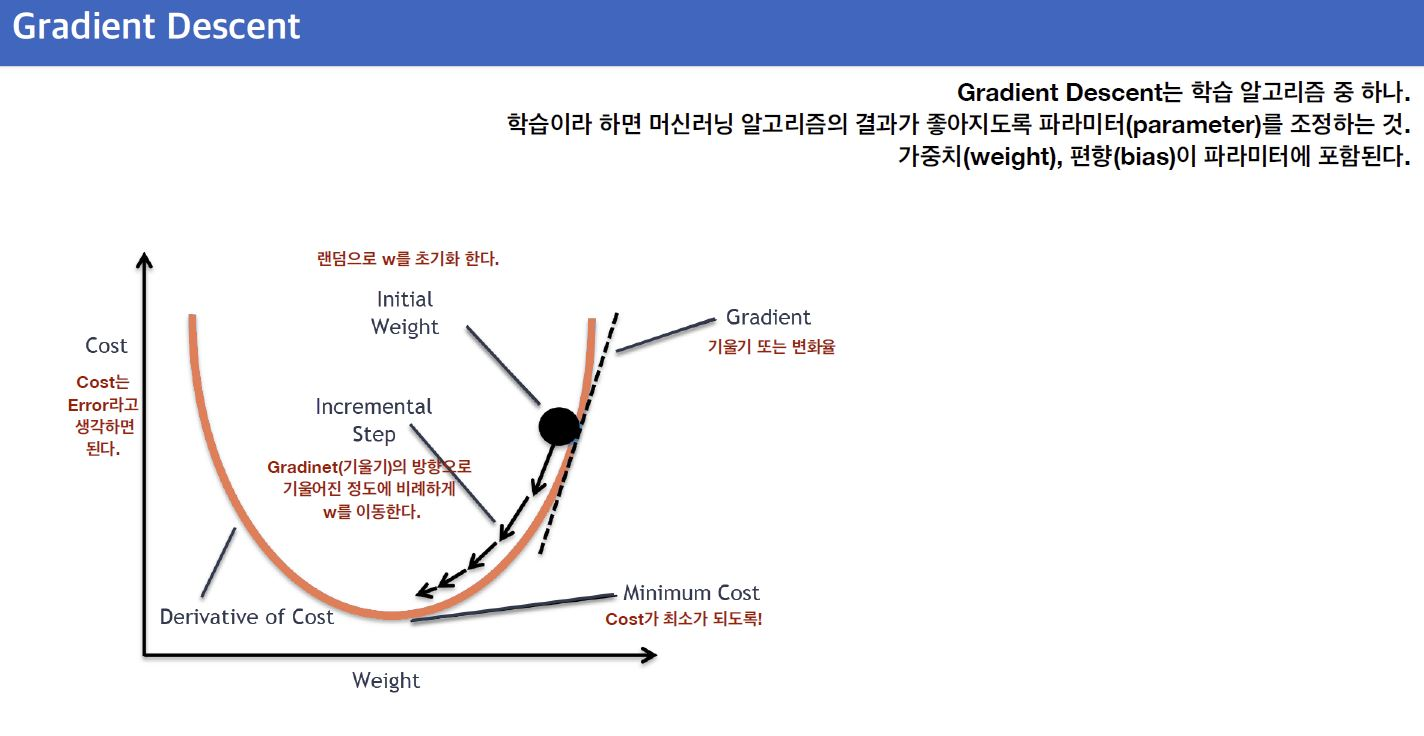
** ------------------------------------------------- **
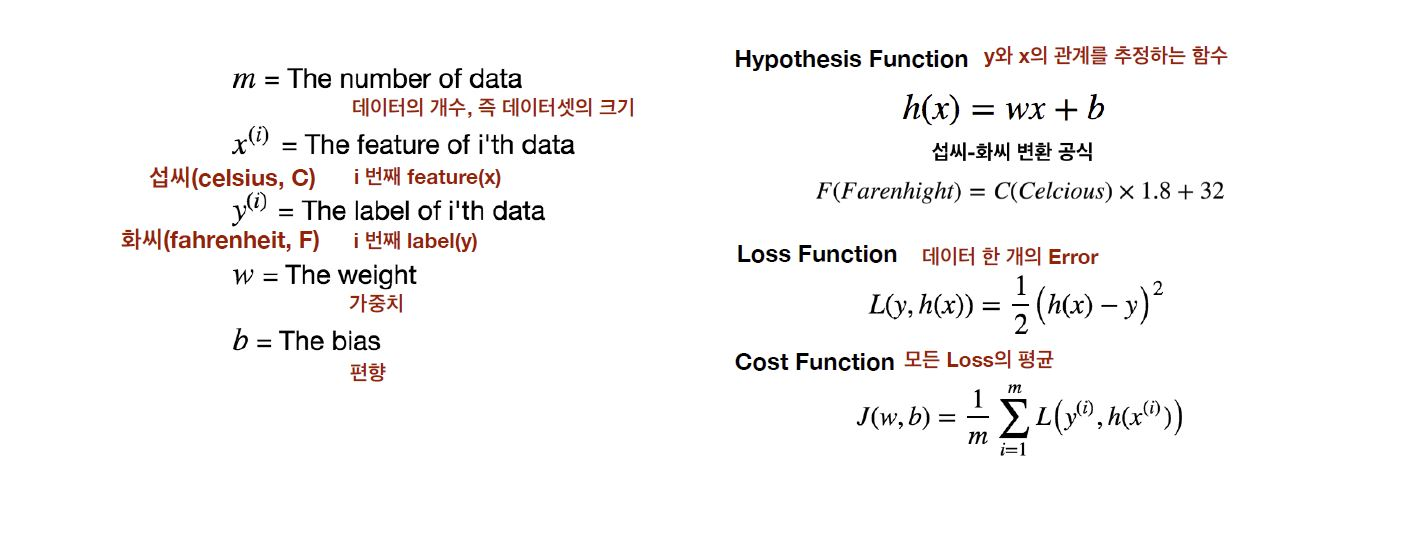
** ------------------------------------------------- **
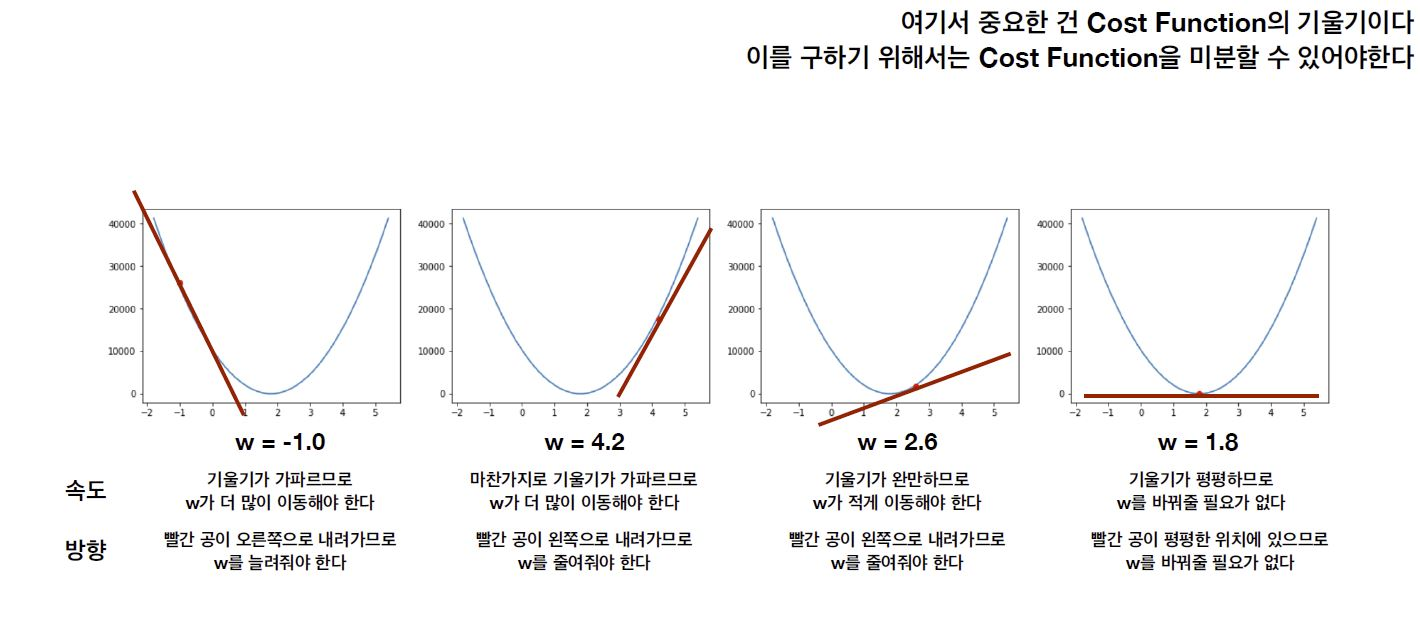
** ------------------------------------------------- **
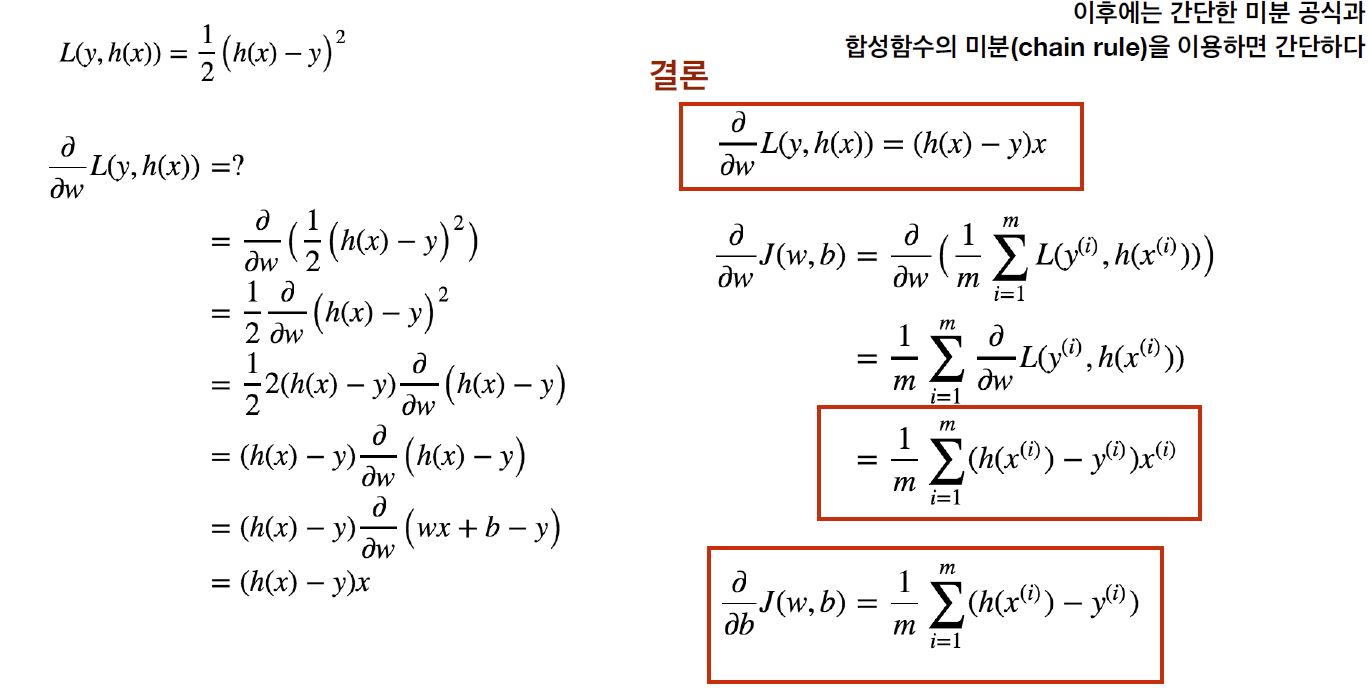

In [1]:
#파이썬으로 경사하강법 구현 
#업데이트할 W : Learning Rate*((Y예측-Y실체)*X)평균 
#업데이트할 b: Learning Rate*((Y예측-Y실체)*1)평균

import numpy as np 
import matplotlib.pyplot as plt

In [34]:
X = np.random.rand(100) 
Y = 0.2 * X * 0.5

In [3]:
X

array([0.32244059, 0.53288672, 0.19579708, 0.47390376, 0.68124461,
       0.48426647, 0.17139392, 0.42156476, 0.20536907, 0.52615028,
       0.85144703, 0.89677999, 0.01182156, 0.8162516 , 0.40694514,
       0.40391733, 0.66751871, 0.63391089, 0.18970454, 0.36551064,
       0.08422028, 0.3510517 , 0.67528708, 0.83551177, 0.54363316,
       0.32319114, 0.33145799, 0.25222507, 0.14160539, 0.60348507,
       0.00631011, 0.52444501, 0.53881553, 0.62067944, 0.6280622 ,
       0.80651256, 0.94061671, 0.57310132, 0.54408782, 0.73110922,
       0.20028023, 0.37419724, 0.49467843, 0.53302182, 0.35970864,
       0.26201941, 0.74215563, 0.20767686, 0.17021914, 0.18109493,
       0.32948041, 0.56965857, 0.32062562, 0.31370392, 0.29267891,
       0.00158912, 0.97672981, 0.30603173, 0.15228037, 0.85952301,
       0.89451733, 0.54270488, 0.65651743, 0.25784003, 0.00531896,
       0.69122547, 0.81674539, 0.01802582, 0.61532969, 0.84642294,
       0.78479142, 0.98009412, 0.19626108, 0.1761724 , 0.90005

In [4]:
Y

array([0.03224406, 0.05328867, 0.01957971, 0.04739038, 0.06812446,
       0.04842665, 0.01713939, 0.04215648, 0.02053691, 0.05261503,
       0.0851447 , 0.089678  , 0.00118216, 0.08162516, 0.04069451,
       0.04039173, 0.06675187, 0.06339109, 0.01897045, 0.03655106,
       0.00842203, 0.03510517, 0.06752871, 0.08355118, 0.05436332,
       0.03231911, 0.0331458 , 0.02522251, 0.01416054, 0.06034851,
       0.00063101, 0.0524445 , 0.05388155, 0.06206794, 0.06280622,
       0.08065126, 0.09406167, 0.05731013, 0.05440878, 0.07311092,
       0.02002802, 0.03741972, 0.04946784, 0.05330218, 0.03597086,
       0.02620194, 0.07421556, 0.02076769, 0.01702191, 0.01810949,
       0.03294804, 0.05696586, 0.03206256, 0.03137039, 0.02926789,
       0.00015891, 0.09767298, 0.03060317, 0.01522804, 0.0859523 ,
       0.08945173, 0.05427049, 0.06565174, 0.025784  , 0.0005319 ,
       0.06912255, 0.08167454, 0.00180258, 0.06153297, 0.08464229,
       0.07847914, 0.09800941, 0.01962611, 0.01761724, 0.09000

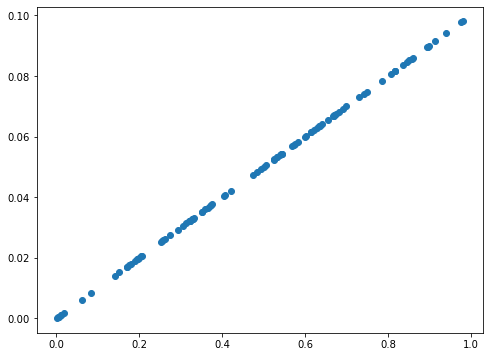

In [5]:
plt.figure(figsize=(8, 6)) 
plt.scatter(X, Y) 
plt.show()

In [6]:
def plot_prediction(pred, y):
    plt.figure(figsize=(6, 4))
    plt.scatter(X, y)
    plt.scatter(X, pred)
    plt.show()

In [40]:
## Gradient Descent 구현 
W = np.random.uniform(-1, 1) 
b = np.random.uniform(-1, 1) 

In [41]:
W

0.9342405245728376

In [42]:
b

-0.5713111761774843

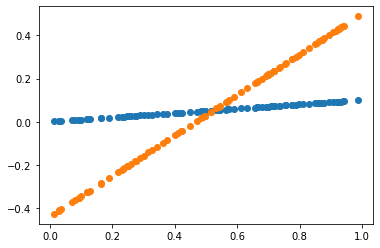

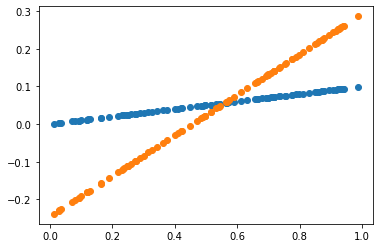

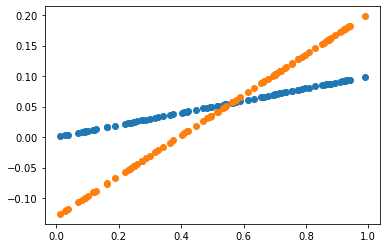

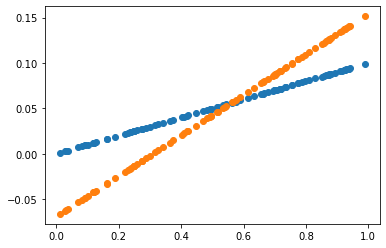

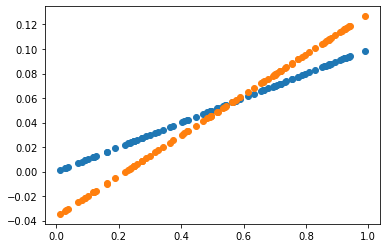

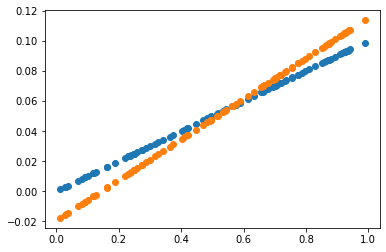

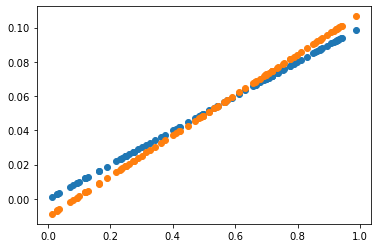

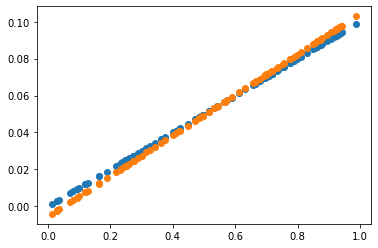

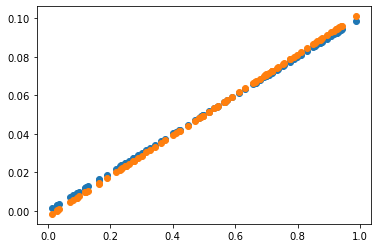

In [43]:
learning_rate = 1

for epoch in range(1000):
    Y_Pred = W * X + b
    
    error = np.abs(Y_Pred - Y).mean() 
    if error < 0.001: 
        break 
    
    #gradient descent
    w_grad = learning_rate * ((Y_Pred - Y)*X).mean()
    b_grad = learning_rate * (Y_Pred - Y).mean() 
    
    #W, b 값 갱신 
    W = W - w_grad
    b = b - b_grad 
    
    if epoch % 10 == 0:
        Y_Pred = W * X + b
        plot_prediction(Y_Pred, Y)

**(예제) 화씨 온도 구하기** 

섭씨온도와 화씨온도가 다음과 같은 선형(linear)관계를 Linear Regression 으로 접근

<br>
<center>$$F = C * 1.8 + 32$$</center>

$$ y = ax + b  ->  y = wx + b $$
<center> w(weight, 가중치), b(bias)  </center>


하지만, 1.8과 32라는 값을 모르고 있다고 가정한 뒤, 머신러닝 알고리즘을 이용하여 주어진 섭씨온도와 화씨온도 데이터만으로 이 값들을 찾아보는 실습을 해보겠습니다. 

#### 방법 1 : 파이썬

In [44]:
# F = C * 1.8 + 32

In [45]:
import numpy as np

In [46]:
C = np.random.randint(low=0, high=100, size=200)
print(len(C))
C

200


array([ 3, 15, 28, 64, 58, 88,  6, 57, 65, 69, 20,  3, 15, 33, 67, 94, 10,
       61, 75, 64, 18,  8, 91,  7, 77, 67, 70, 97, 93, 34, 64, 76, 68, 22,
       95, 25, 36, 24, 36, 60, 48, 79, 95, 16, 66, 88, 75, 96, 10, 25, 74,
       12, 71, 31, 21, 21, 92, 53, 45, 68, 88, 20, 22, 42, 95, 99, 90, 74,
       94, 22, 23, 85, 87,  2, 39, 33, 50, 94, 50, 99, 13, 85, 79, 97, 34,
       30, 26, 77, 67, 10, 73, 25, 14, 16, 44, 20, 18, 87, 81, 59, 35, 69,
       22, 89, 79, 26, 60, 99, 38, 64, 40, 98, 87, 62, 47, 96, 71, 45,  9,
       77, 95,  5, 96, 71, 77, 73, 96, 19, 14, 12, 45, 72, 30,  2, 88,  3,
       59,  6,  9, 87, 46, 30, 41, 83,  9,  7,  9, 10, 71, 19, 85, 33, 12,
        6, 44, 12, 81, 88, 54, 70, 48, 27, 62, 52, 82, 56, 15,  1, 50, 19,
       40, 73, 54, 35, 11,  7, 29,  9, 99, 65,  4, 95,  5, 87,  6,  3, 14,
       18, 57, 39, 35, 20, 97, 41, 21, 14, 95, 20, 80, 23])

In [47]:
F = C * 1.8 + 32
F

array([ 37.4,  59. ,  82.4, 147.2, 136.4, 190.4,  42.8, 134.6, 149. ,
       156.2,  68. ,  37.4,  59. ,  91.4, 152.6, 201.2,  50. , 141.8,
       167. , 147.2,  64.4,  46.4, 195.8,  44.6, 170.6, 152.6, 158. ,
       206.6, 199.4,  93.2, 147.2, 168.8, 154.4,  71.6, 203. ,  77. ,
        96.8,  75.2,  96.8, 140. , 118.4, 174.2, 203. ,  60.8, 150.8,
       190.4, 167. , 204.8,  50. ,  77. , 165.2,  53.6, 159.8,  87.8,
        69.8,  69.8, 197.6, 127.4, 113. , 154.4, 190.4,  68. ,  71.6,
       107.6, 203. , 210.2, 194. , 165.2, 201.2,  71.6,  73.4, 185. ,
       188.6,  35.6, 102.2,  91.4, 122. , 201.2, 122. , 210.2,  55.4,
       185. , 174.2, 206.6,  93.2,  86. ,  78.8, 170.6, 152.6,  50. ,
       163.4,  77. ,  57.2,  60.8, 111.2,  68. ,  64.4, 188.6, 177.8,
       138.2,  95. , 156.2,  71.6, 192.2, 174.2,  78.8, 140. , 210.2,
       100.4, 147.2, 104. , 208.4, 188.6, 143.6, 116.6, 204.8, 159.8,
       113. ,  48.2, 170.6, 203. ,  41. , 204.8, 159.8, 170.6, 163.4,
       204.8,  66.2,

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

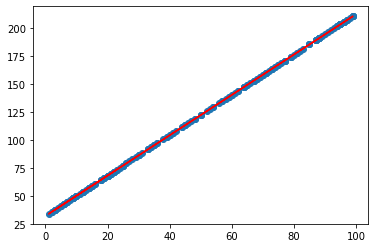

In [49]:
plt.scatter(C, F)
plt.plot(C, F, c='r')

In [50]:
X = C
y = F

X, y

(array([ 3, 15, 28, 64, 58, 88,  6, 57, 65, 69, 20,  3, 15, 33, 67, 94, 10,
        61, 75, 64, 18,  8, 91,  7, 77, 67, 70, 97, 93, 34, 64, 76, 68, 22,
        95, 25, 36, 24, 36, 60, 48, 79, 95, 16, 66, 88, 75, 96, 10, 25, 74,
        12, 71, 31, 21, 21, 92, 53, 45, 68, 88, 20, 22, 42, 95, 99, 90, 74,
        94, 22, 23, 85, 87,  2, 39, 33, 50, 94, 50, 99, 13, 85, 79, 97, 34,
        30, 26, 77, 67, 10, 73, 25, 14, 16, 44, 20, 18, 87, 81, 59, 35, 69,
        22, 89, 79, 26, 60, 99, 38, 64, 40, 98, 87, 62, 47, 96, 71, 45,  9,
        77, 95,  5, 96, 71, 77, 73, 96, 19, 14, 12, 45, 72, 30,  2, 88,  3,
        59,  6,  9, 87, 46, 30, 41, 83,  9,  7,  9, 10, 71, 19, 85, 33, 12,
         6, 44, 12, 81, 88, 54, 70, 48, 27, 62, 52, 82, 56, 15,  1, 50, 19,
        40, 73, 54, 35, 11,  7, 29,  9, 99, 65,  4, 95,  5, 87,  6,  3, 14,
        18, 57, 39, 35, 20, 97, 41, 21, 14, 95, 20, 80, 23]),
 array([ 37.4,  59. ,  82.4, 147.2, 136.4, 190.4,  42.8, 134.6, 149. ,
        156.2,  68. ,  37.4,  5

In [62]:
# y = X * w + b
w = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)
w, b

(0.8979469750146969, -0.5317677410147132)

In [63]:
y_predict = X * w + b
y_predict

array([ 2.16207318, 12.93743688, 24.61074756, 56.93683866, 51.54915681,
       78.48756606,  4.85591411, 50.65120983, 57.83478563, 61.42657353,
       17.42717176,  2.16207318, 12.93743688, 29.10048243, 59.63067958,
       83.87524791,  8.44770201, 54.24299773, 66.81425539, 56.93683866,
       15.63127781,  6.65180806, 81.18140699,  5.75386108, 68.61014934,
       59.63067958, 62.32452051, 86.56908884, 82.97730094, 29.99842941,
       56.93683866, 67.71220236, 60.52862656, 19.22306571, 84.77319489,
       21.91690663, 31.79432336, 21.01895966, 31.79432336, 53.34505076,
       42.56968706, 70.40604329, 84.77319489, 13.83538386, 58.73273261,
       78.48756606, 66.81425539, 85.67114186,  8.44770201, 21.91690663,
       65.91630841, 10.24359596, 63.22246749, 27.30458848, 18.32511873,
       18.32511873, 82.07935396, 47.05942193, 39.87584613, 60.52862656,
       78.48756606, 17.42717176, 19.22306571, 37.18200521, 84.77319489,
       88.36498279, 80.28346001, 65.91630841, 83.87524791, 19.22

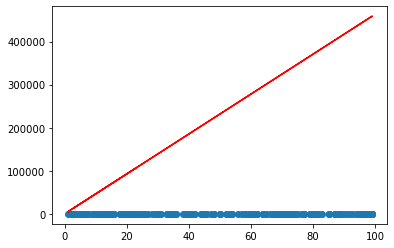

In [68]:
plt.scatter(C, F)
plt.plot(X, y_predict, c='r') # 파랑 : 정답 / 빨강 : 예측값

In [65]:
b = b - (y_predict - y).mean()
b

76.2096187545297

In [66]:
# y = X * w + b
# 경사하강법 공식
# 업데이트할w : LearningRate * ((Y예측 - Y실제)*X)평균
# 업데이트할b : LearningRate * ((Y예측 - Y실제)*1)평균
w = w - ((y_predict - y) * X).mean()
w

4633.286225749648

In [67]:
y_predict = X * w + b
y_predict

array([ 13976.068296  ,  69575.503005  , 129808.22393974, 296606.52806673,
       268806.81071223, 407805.39748472,  27875.92697325, 264173.52448648,
       301239.81429248, 319772.95919548,  92741.93413375,  13976.068296  ,
        69575.503005  , 152974.65506849, 310506.38674398, 435605.11483922,
        46409.07187625, 282706.66938948, 347572.67654998, 296606.52806673,
        83475.36168225,  37142.49942475, 421705.25616197,  32509.213199  ,
       356839.24900148, 310506.38674398, 324406.24542123, 449504.97351647,
       430971.82861347, 157607.94129424, 296606.52806673, 352205.96277573,
       315139.67296973, 102008.50658525, 440238.40106497, 115908.3652625 ,
       166874.51374574, 111275.07903675, 166874.51374574, 278073.38316373,
       222473.94845474, 366105.82145298, 440238.40106497,  74208.78923075,
       305873.10051823, 407805.39748472, 347572.67654998, 444871.68729072,
        46409.07187625, 115908.3652625 , 342939.39032423,  55675.64432775,
       329039.53164698, 1

0, w =  2.281123, b =  0.295201


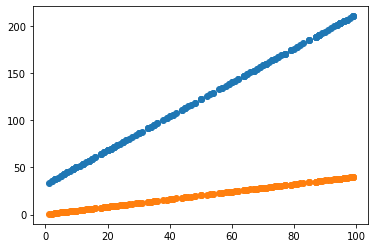

1000, w =  2.223383, b =  2.908316


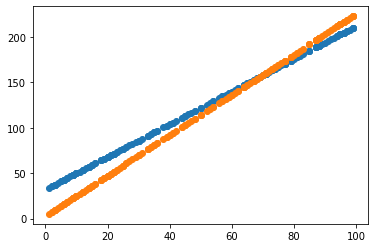

2000, w =  2.188485, b =  5.306300


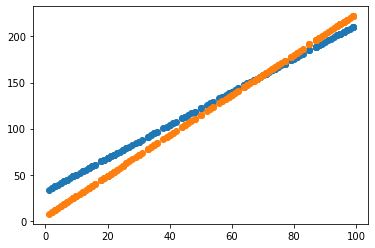

3000, w =  2.156462, b =  7.506621


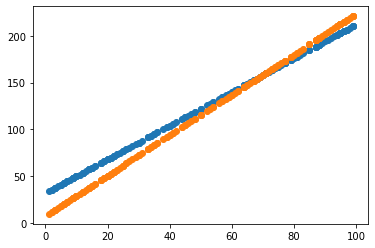

4000, w =  2.127080, b =  9.525573


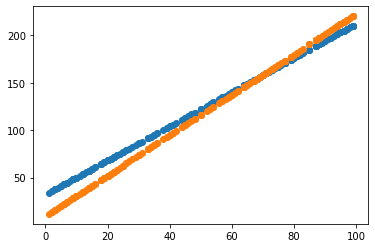

5000, w =  2.100119, b =  11.378107


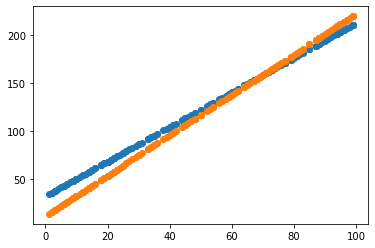

6000, w =  2.075381, b =  13.077938


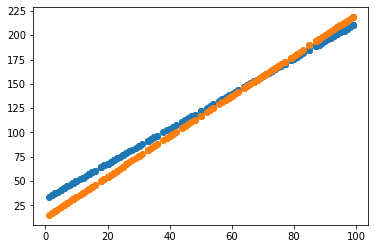

7000, w =  2.052682, b =  14.637655


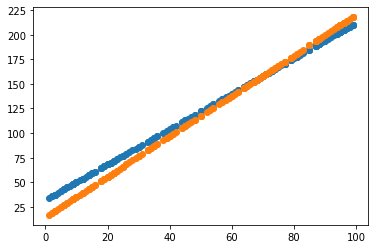

8000, w =  2.031853, b =  16.068807


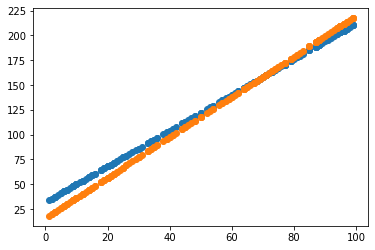

9000, w =  2.012742, b =  17.381991


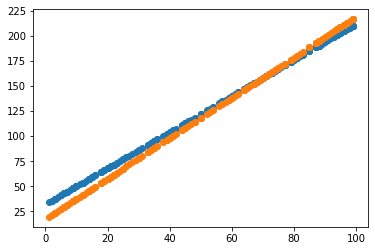

10000, w =  1.995206, b =  18.586932


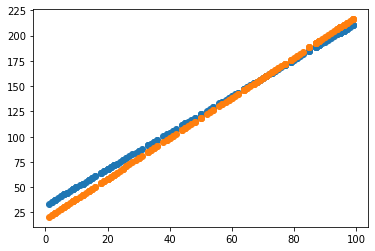

11000, w =  1.979115, b =  19.692550


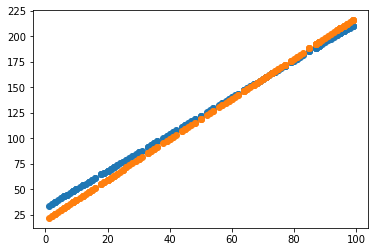

12000, w =  1.964351, b =  20.707035


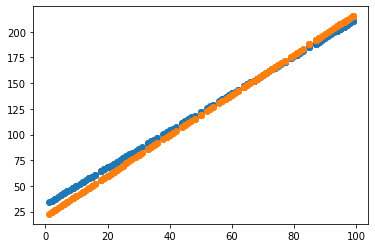

13000, w =  1.950804, b =  21.637897


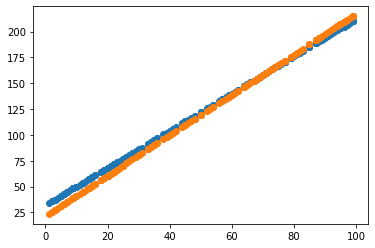

14000, w =  1.938373, b =  22.492030


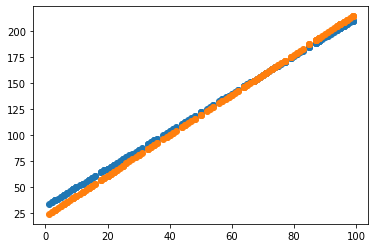

15000, w =  1.926968, b =  23.275757


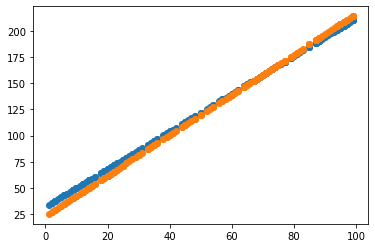

16000, w =  1.916502, b =  23.994883


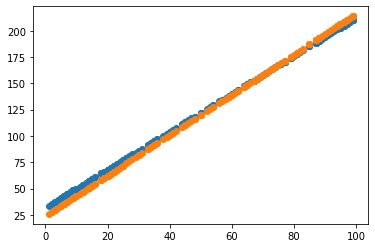

17000, w =  1.906899, b =  24.654733


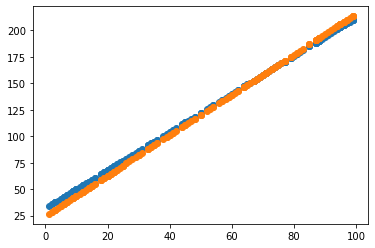

18000, w =  1.898087, b =  25.260192


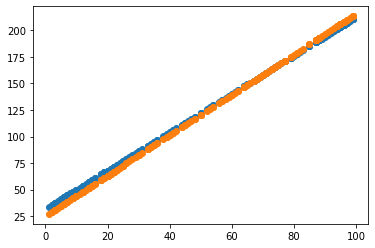

19000, w =  1.890002, b =  25.815744


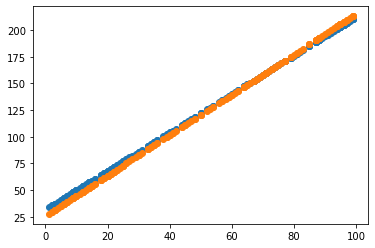

20000, w =  1.882583, b =  26.325503


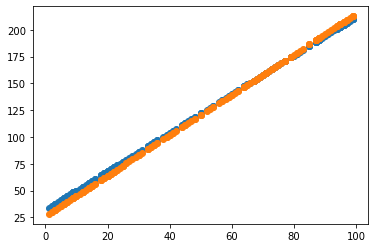

21000, w =  1.875776, b =  26.793243


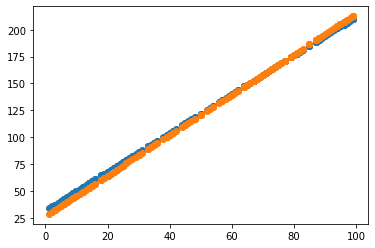

22000, w =  1.869530, b =  27.222429


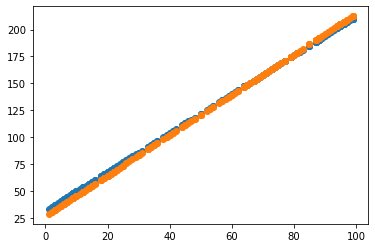

23000, w =  1.863799, b =  27.616237


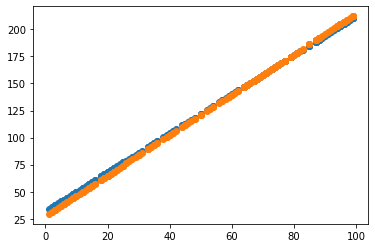

24000, w =  1.858540, b =  27.977584


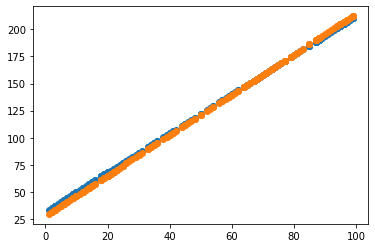

25000, w =  1.853715, b =  28.309145


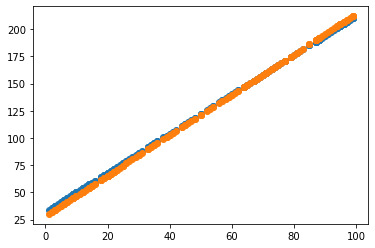

26000, w =  1.849287, b =  28.613377


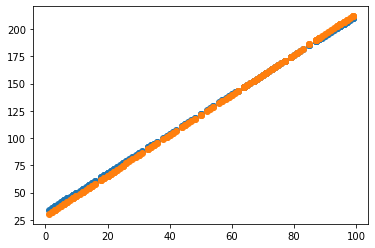

27000, w =  1.845224, b =  28.892531


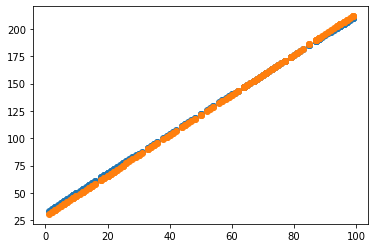

28000, w =  1.841497, b =  29.148675


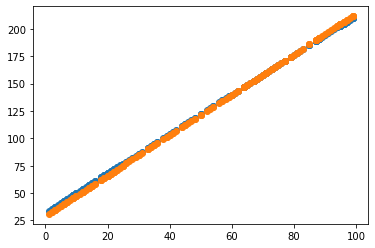

29000, w =  1.838076, b =  29.383705


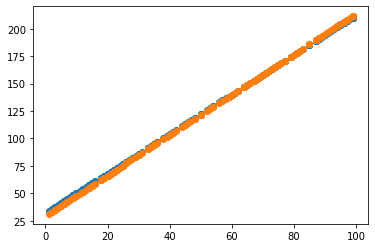

30000, w =  1.834937, b =  29.599363


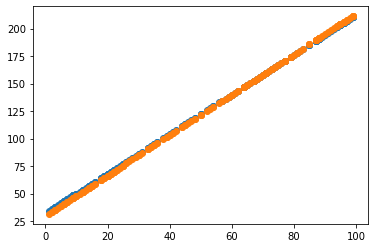

31000, w =  1.832058, b =  29.797244


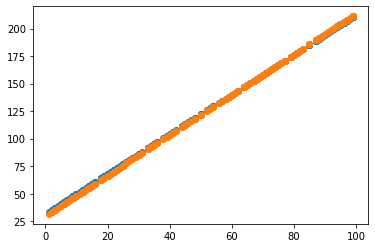

32000, w =  1.829415, b =  29.978813


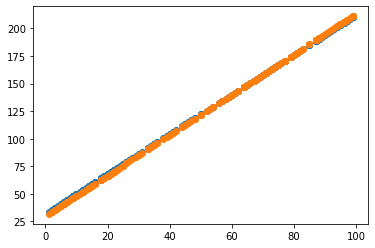

33000, w =  1.826991, b =  30.145417


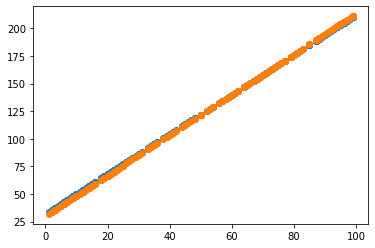

34000, w =  1.824766, b =  30.298287


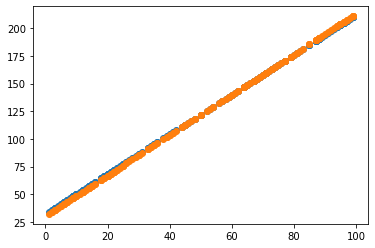

35000, w =  1.822724, b =  30.438557


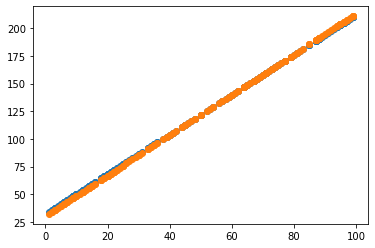

36000, w =  1.820851, b =  30.567264


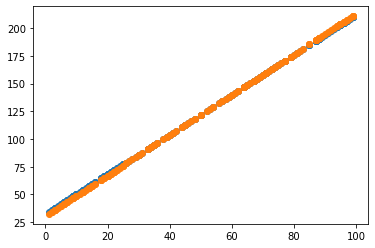

37000, w =  1.819132, b =  30.685363


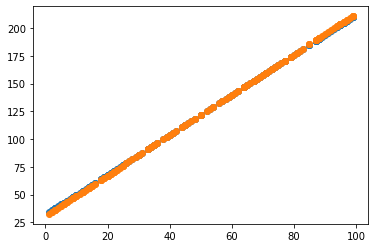

38000, w =  1.817555, b =  30.793726


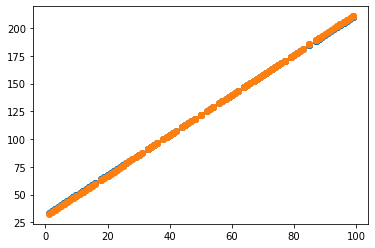

39000, w =  1.816108, b =  30.893157


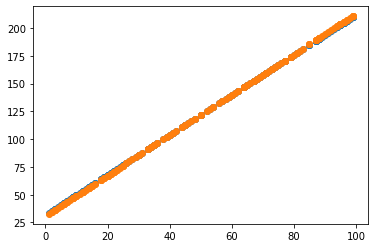

40000, w =  1.814781, b =  30.984393


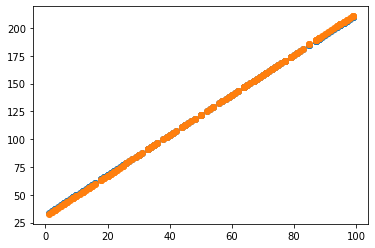

41000, w =  1.813562, b =  31.068108


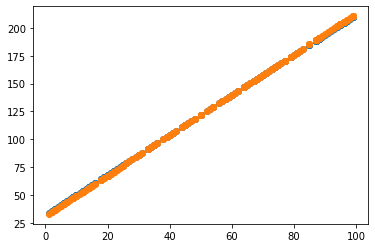

42000, w =  1.812444, b =  31.144922


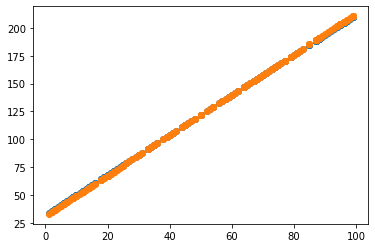

43000, w =  1.811419, b =  31.215405


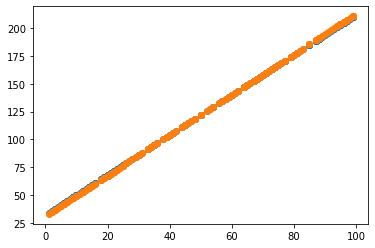

44000, w =  1.810477, b =  31.280078


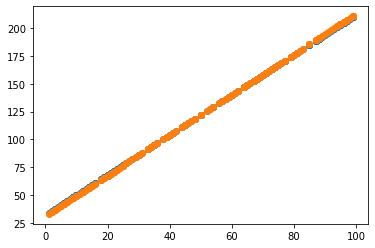

45000, w =  1.809614, b =  31.339420


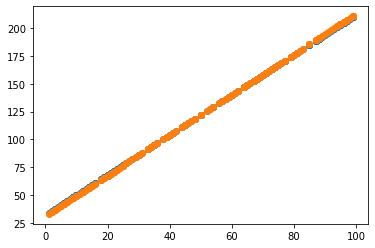

46000, w =  1.808821, b =  31.393871


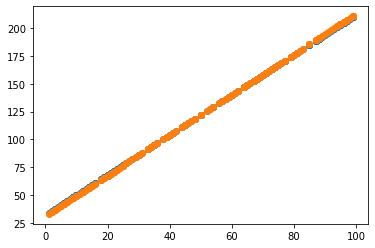

47000, w =  1.808094, b =  31.443833


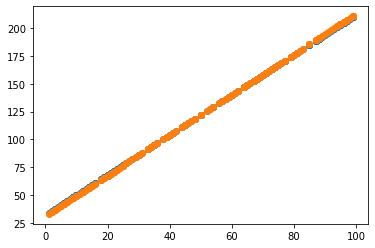

48000, w =  1.807427, b =  31.489677


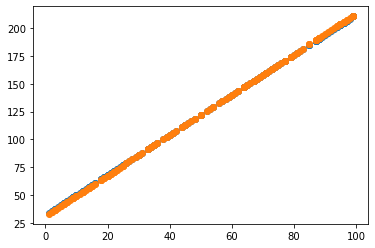

49000, w =  1.806815, b =  31.531742


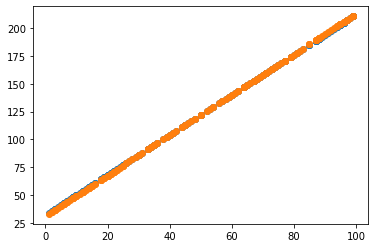

50000, w =  1.806253, b =  31.570340


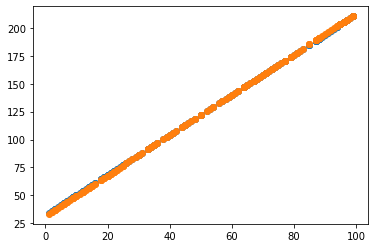

51000, w =  1.805738, b =  31.605756


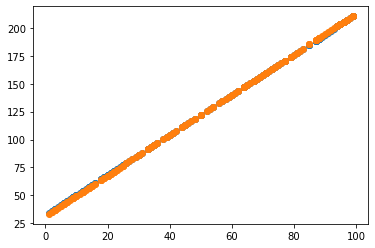

52000, w =  1.805265, b =  31.638253


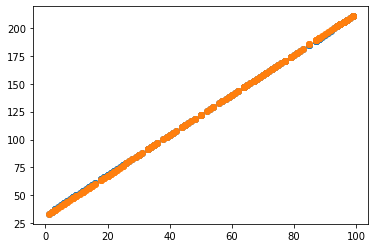

53000, w =  1.804831, b =  31.668071


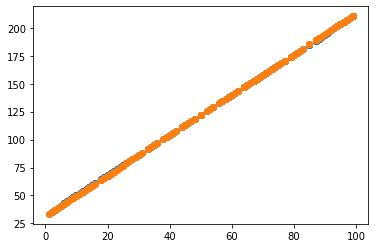

54000, w =  1.804433, b =  31.695432


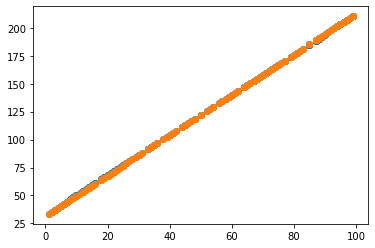

55000, w =  1.804067, b =  31.720537


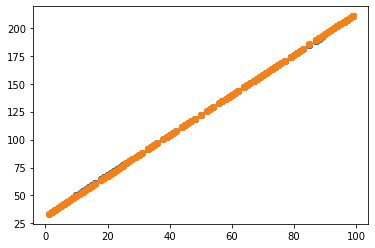

56000, w =  1.803732, b =  31.743573


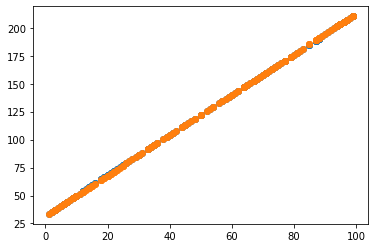

57000, w =  1.803424, b =  31.764709


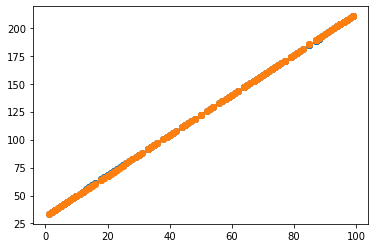

58000, w =  1.803142, b =  31.784104


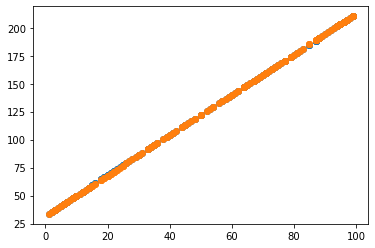

59000, w =  1.802883, b =  31.801900


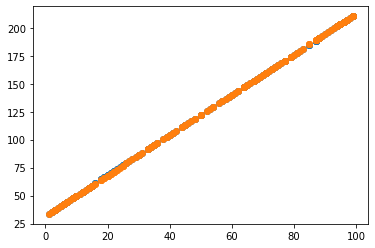

60000, w =  1.802645, b =  31.818229


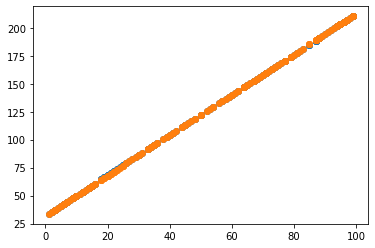

61000, w =  1.802427, b =  31.833212


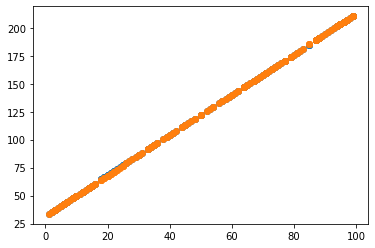

62000, w =  1.802227, b =  31.846960


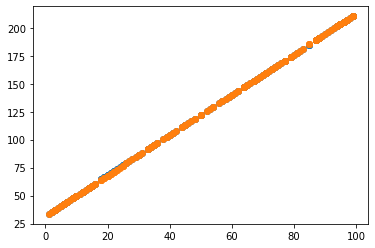

63000, w =  1.802044, b =  31.859575


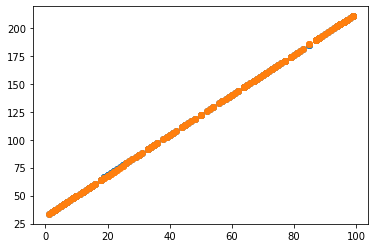

64000, w =  1.801875, b =  31.871150


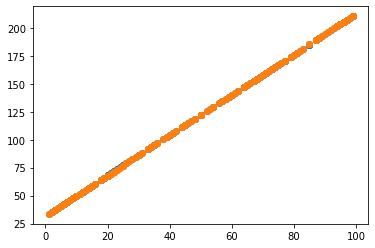

65000, w =  1.801721, b =  31.881771


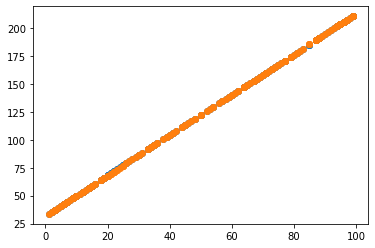

66000, w =  1.801579, b =  31.891516


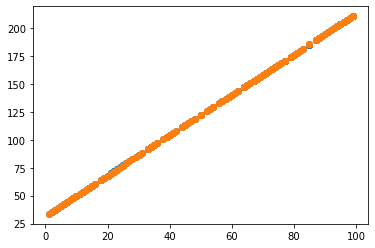

67000, w =  1.801449, b =  31.900459


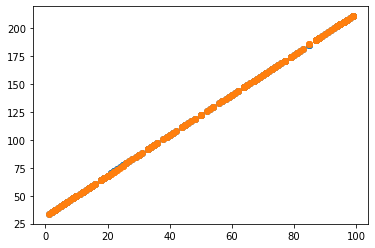

68000, w =  1.801329, b =  31.908664


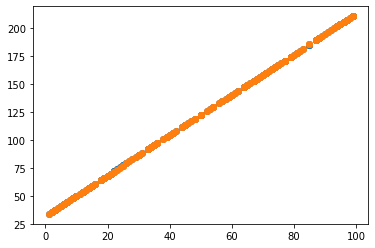

69000, w =  1.801220, b =  31.916192


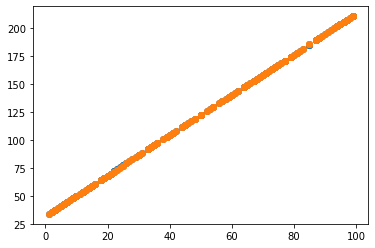

70000, w =  1.801119, b =  31.923101


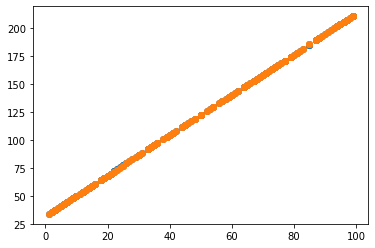

71000, w =  1.801027, b =  31.929439


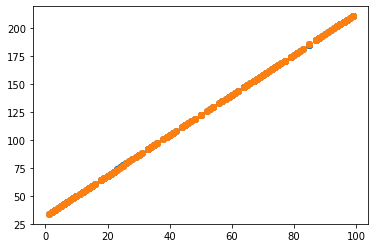

72000, w =  1.800942, b =  31.935255


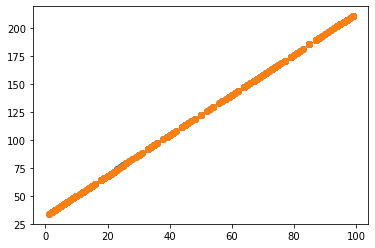

73000, w =  1.800865, b =  31.940592


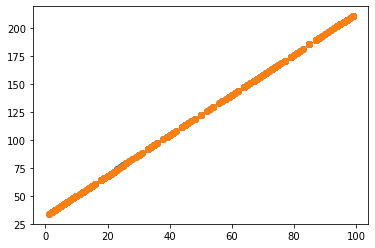

74000, w =  1.800793, b =  31.945489


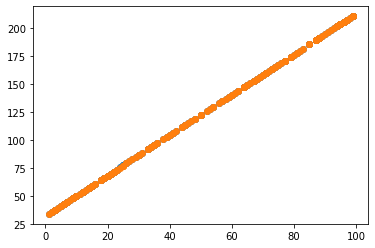

75000, w =  1.800728, b =  31.949982


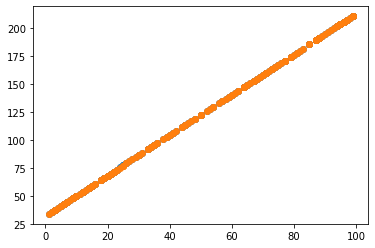

76000, w =  1.800668, b =  31.954105


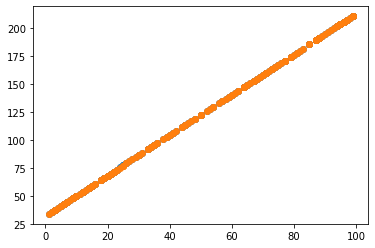

77000, w =  1.800613, b =  31.957888


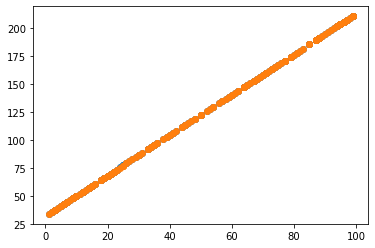

78000, w =  1.800562, b =  31.961359


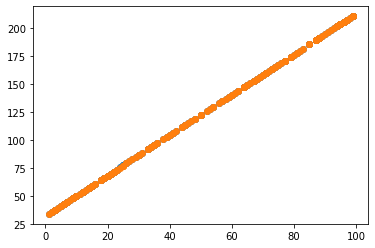

79000, w =  1.800516, b =  31.964545


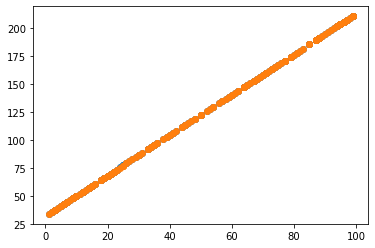

80000, w =  1.800473, b =  31.967467


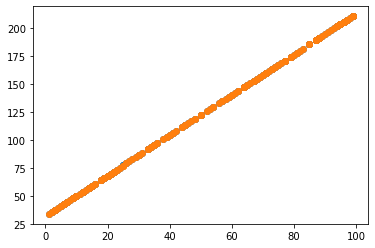

81000, w =  1.800434, b =  31.970149


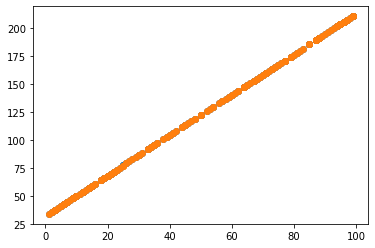

82000, w =  1.800399, b =  31.972609


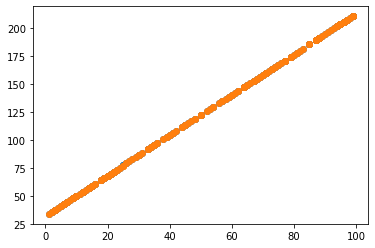

83000, w =  1.800366, b =  31.974867


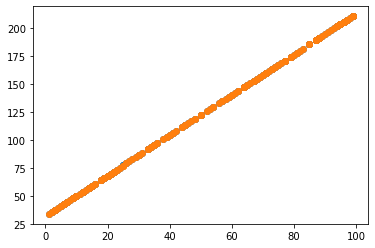

84000, w =  1.800336, b =  31.976939


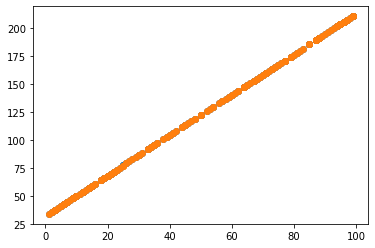

85000, w =  1.800308, b =  31.978840


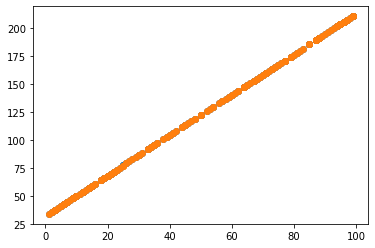

86000, w =  1.800283, b =  31.980584


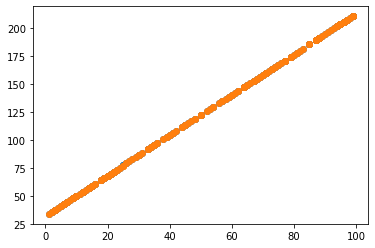

87000, w =  1.800259, b =  31.982184


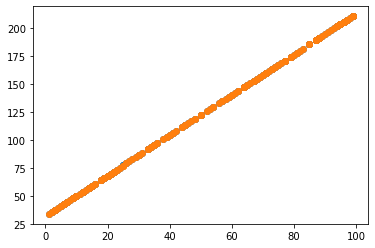

88000, w =  1.800238, b =  31.983653


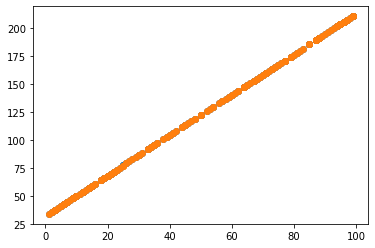

89000, w =  1.800218, b =  31.985000


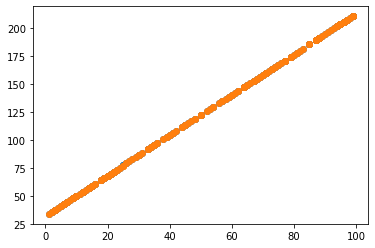

90000, w =  1.800200, b =  31.986237


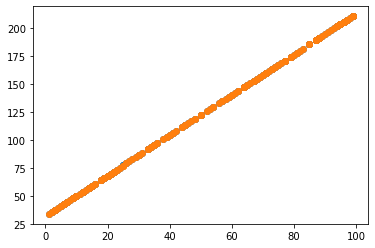

91000, w =  1.800184, b =  31.987371


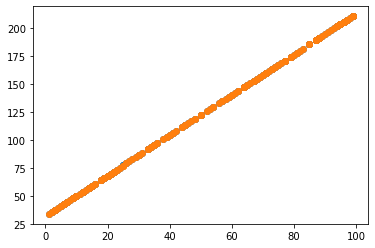

92000, w =  1.800169, b =  31.988412


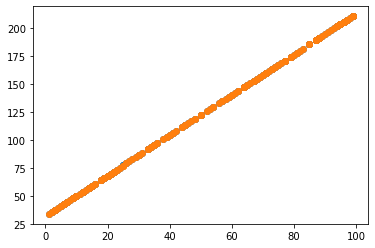

93000, w =  1.800155, b =  31.989367


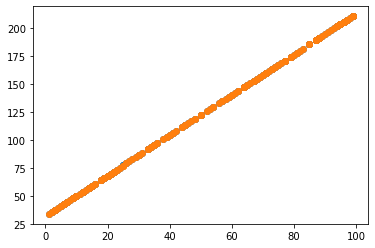

94000, w =  1.800142, b =  31.990244


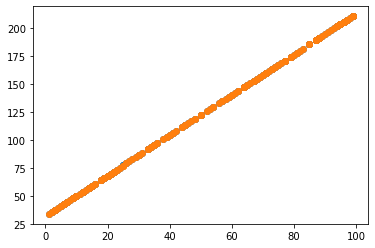

95000, w =  1.800130, b =  31.991048


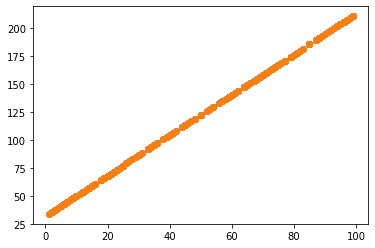

96000, w =  1.800120, b =  31.991786


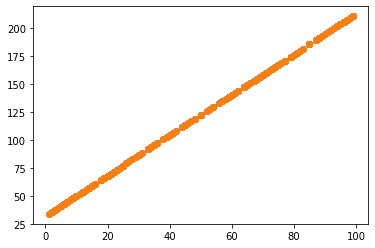

97000, w =  1.800110, b =  31.992463


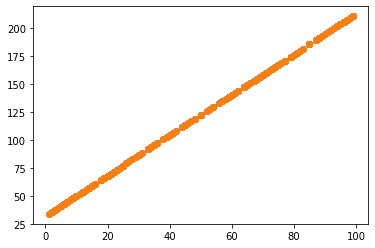

98000, w =  1.800101, b =  31.993084


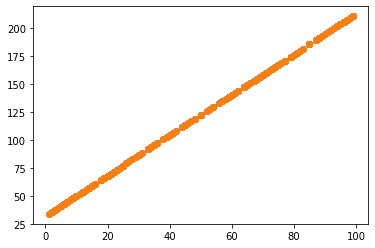

99000, w =  1.800092, b =  31.993654


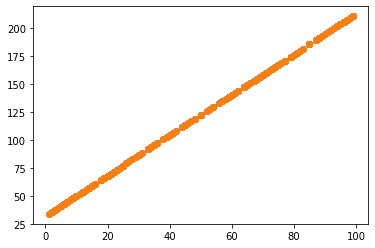

100000, w =  1.800085, b =  31.994177


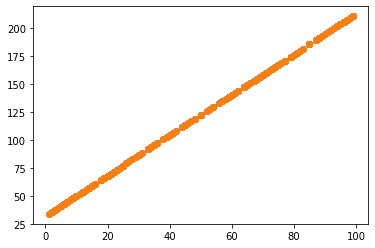

101000, w =  1.800078, b =  31.994657


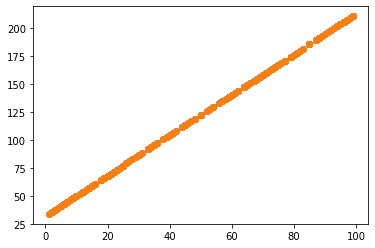

102000, w =  1.800071, b =  31.995098


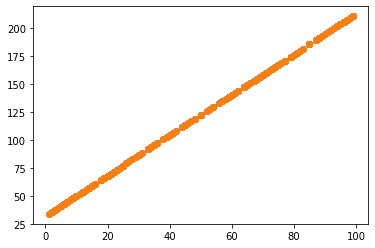

103000, w =  1.800065, b =  31.995502


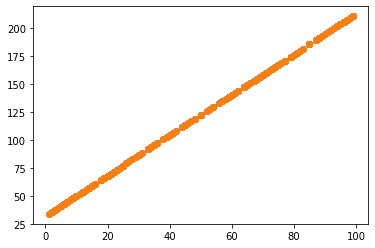

104000, w =  1.800060, b =  31.995873


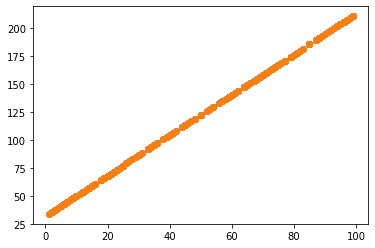

105000, w =  1.800055, b =  31.996213


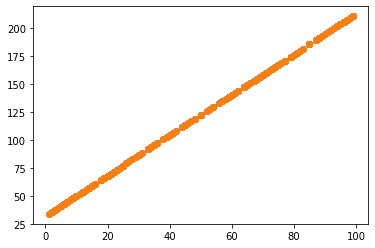

106000, w =  1.800051, b =  31.996525


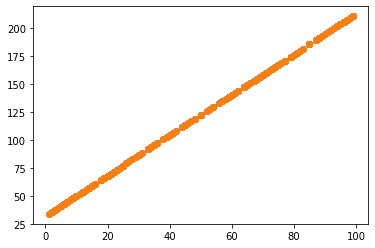

107000, w =  1.800046, b =  31.996811


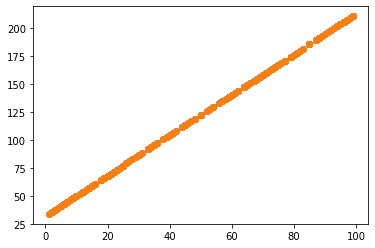

108000, w =  1.800043, b =  31.997074


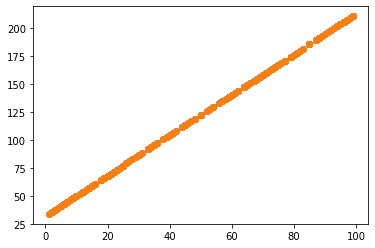

109000, w =  1.800039, b =  31.997315


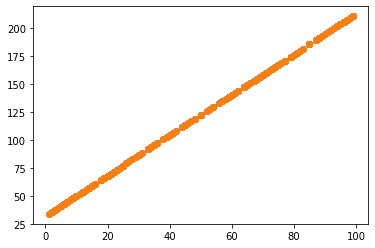

110000, w =  1.800036, b =  31.997537


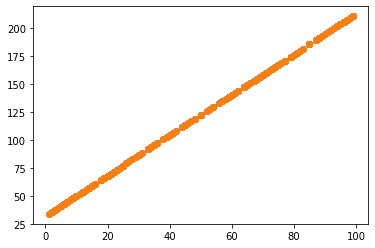

111000, w =  1.800033, b =  31.997740


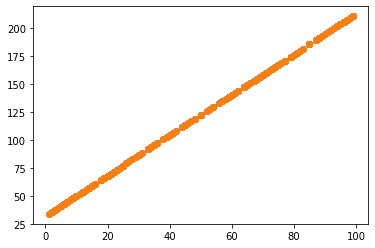

112000, w =  1.800030, b =  31.997926


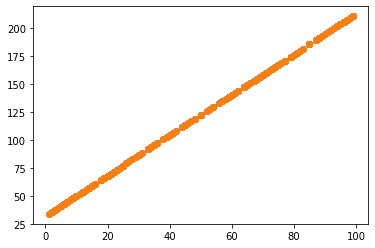

113000, w =  1.800028, b =  31.998097


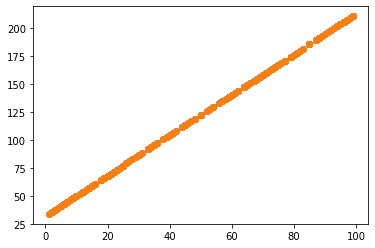

114000, w =  1.800025, b =  31.998254


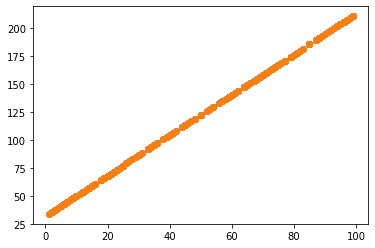

115000, w =  1.800023, b =  31.998398


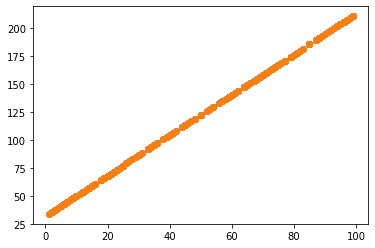

116000, w =  1.800021, b =  31.998530


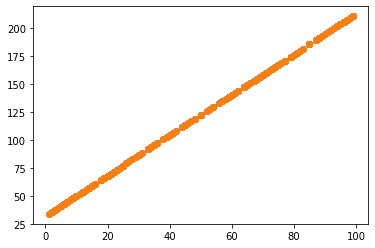

117000, w =  1.800020, b =  31.998651


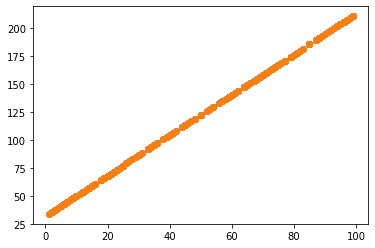

118000, w =  1.800018, b =  31.998762


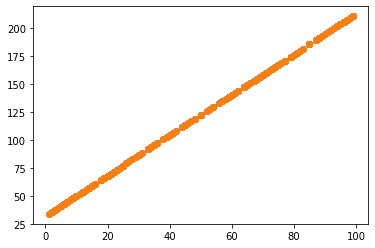

119000, w =  1.800017, b =  31.998864


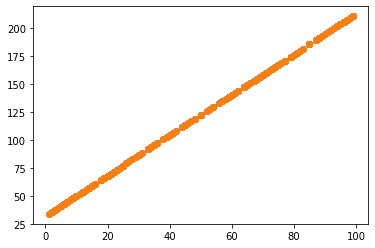

120000, w =  1.800015, b =  31.998958


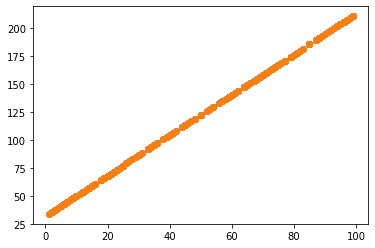

121000, w =  1.800014, b =  31.999044


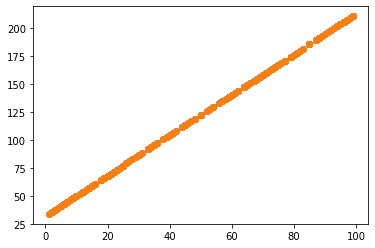

122000, w =  1.800013, b =  31.999123


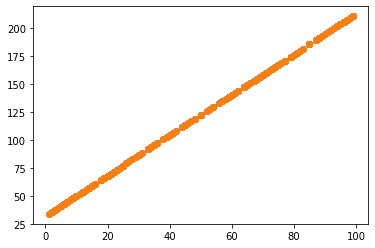

123000, w =  1.800012, b =  31.999195


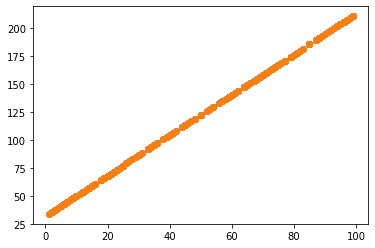

124000, w =  1.800011, b =  31.999261


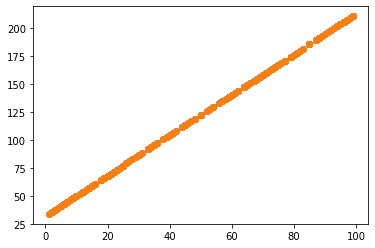

125000, w =  1.800010, b =  31.999322


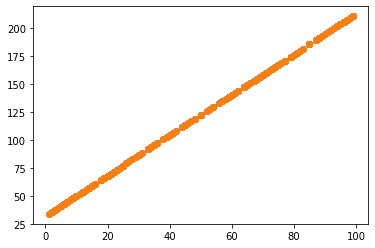

126000, w =  1.800009, b =  31.999378


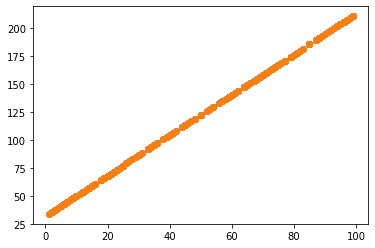

127000, w =  1.800008, b =  31.999429


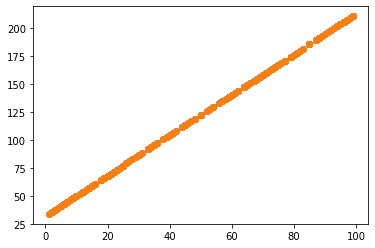

128000, w =  1.800008, b =  31.999476


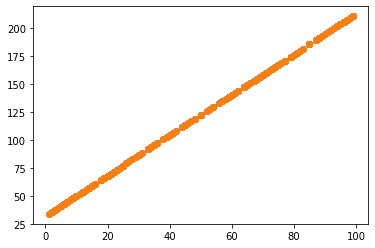

129000, w =  1.800007, b =  31.999520


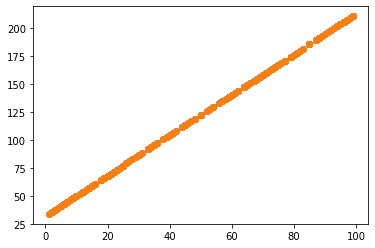

130000, w =  1.800006, b =  31.999559


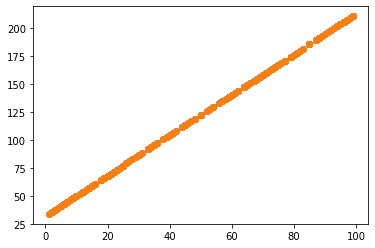

131000, w =  1.800006, b =  31.999595


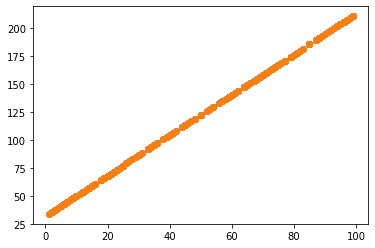

132000, w =  1.800005, b =  31.999629


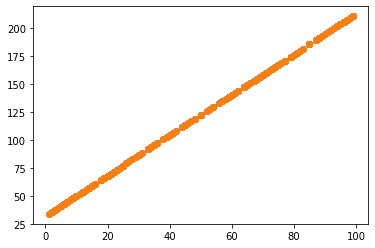

133000, w =  1.800005, b =  31.999659


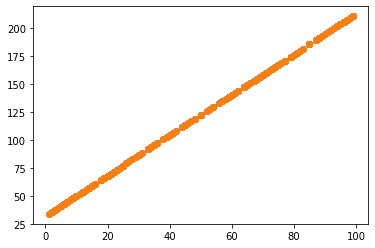

134000, w =  1.800005, b =  31.999687


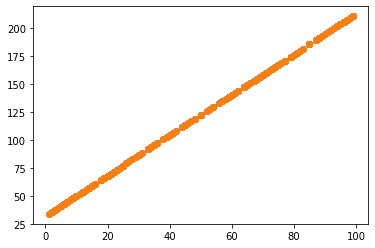

135000, w =  1.800004, b =  31.999713


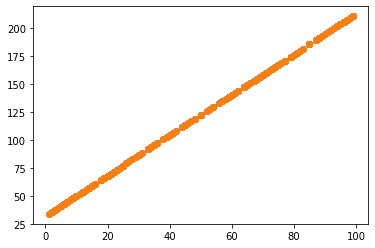

136000, w =  1.800004, b =  31.999737


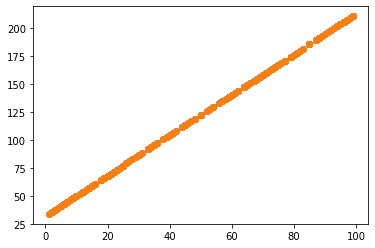

137000, w =  1.800004, b =  31.999759


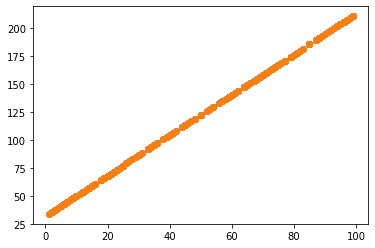

138000, w =  1.800003, b =  31.999778


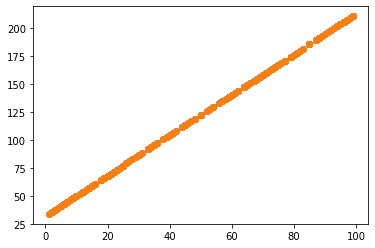

139000, w =  1.800003, b =  31.999797


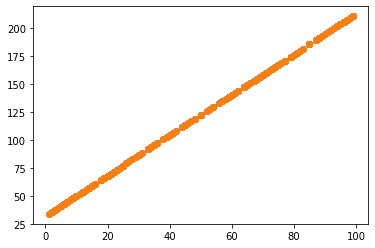

140000, w =  1.800003, b =  31.999813


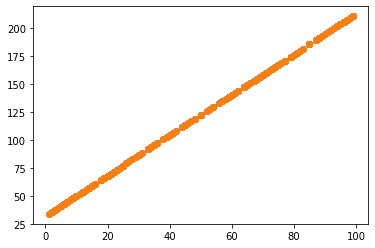

141000, w =  1.800002, b =  31.999829


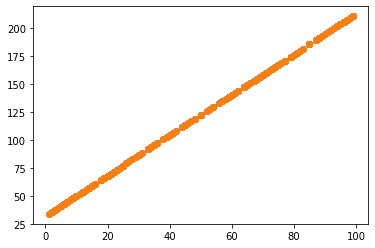

142000, w =  1.800002, b =  31.999843


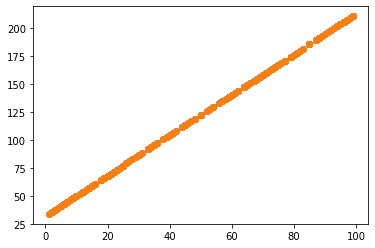

143000, w =  1.800002, b =  31.999856


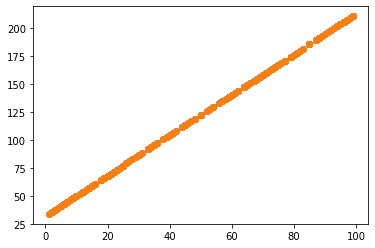

144000, w =  1.800002, b =  31.999868


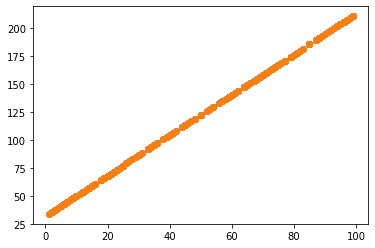

145000, w =  1.800002, b =  31.999879


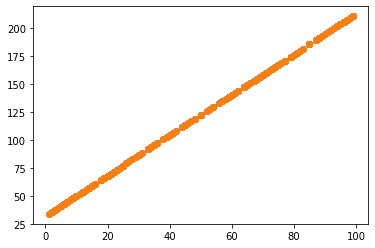

146000, w =  1.800002, b =  31.999889


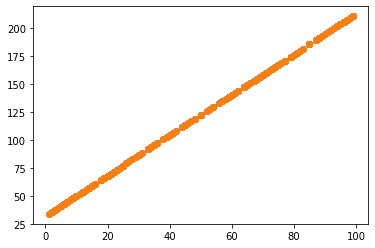

147000, w =  1.800001, b =  31.999898


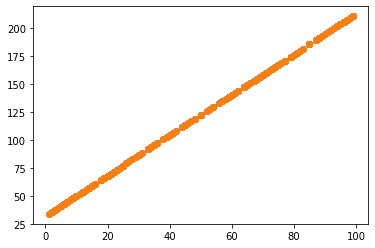

148000, w =  1.800001, b =  31.999906


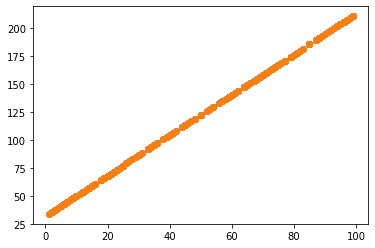

149000, w =  1.800001, b =  31.999914


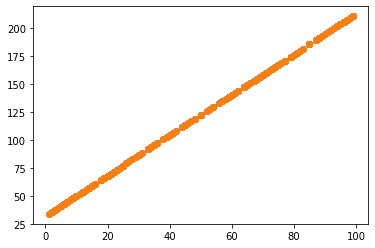

150000, w =  1.800001, b =  31.999921


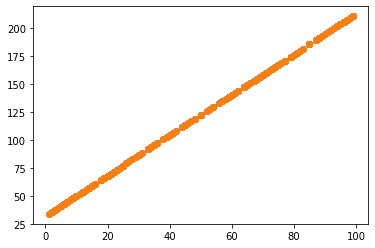

151000, w =  1.800001, b =  31.999928


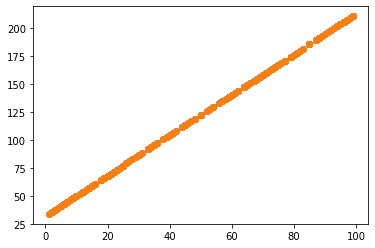

152000, w =  1.800001, b =  31.999934


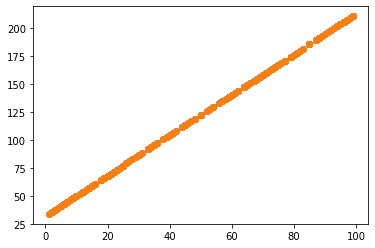

153000, w =  1.800001, b =  31.999939


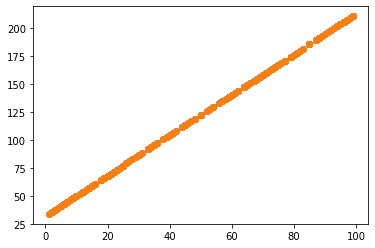

154000, w =  1.800001, b =  31.999944


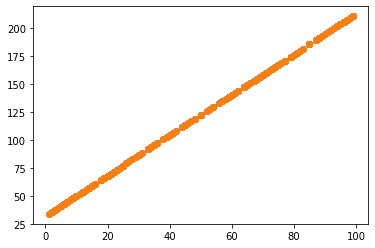

155000, w =  1.800001, b =  31.999949


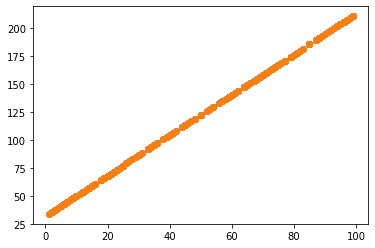

156000, w =  1.800001, b =  31.999953


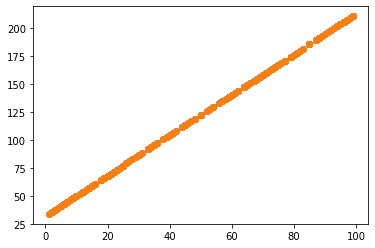

157000, w =  1.800001, b =  31.999957


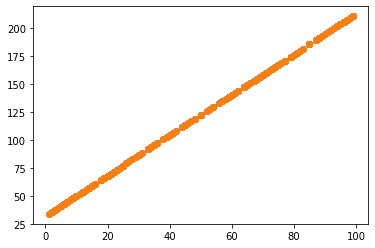

158000, w =  1.800001, b =  31.999960


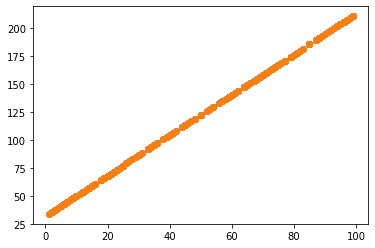

159000, w =  1.800001, b =  31.999964


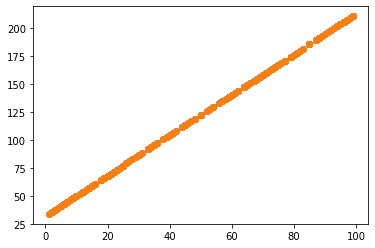

160000, w =  1.800000, b =  31.999967


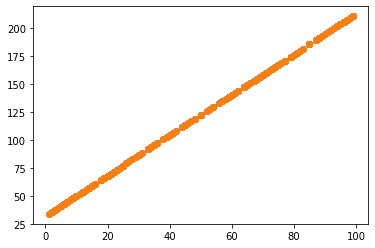

161000, w =  1.800000, b =  31.999969


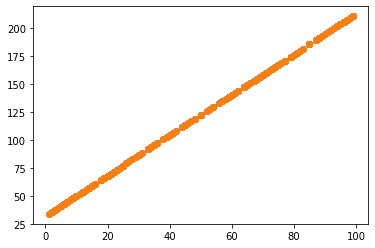

162000, w =  1.800000, b =  31.999972


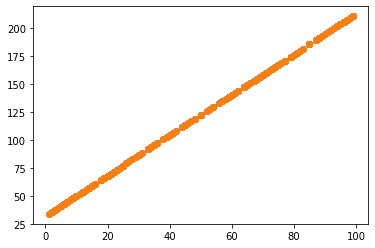

163000, w =  1.800000, b =  31.999974


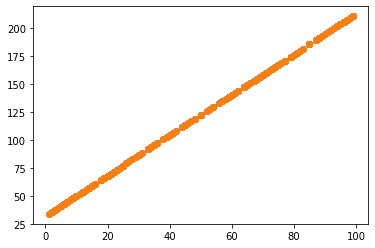

164000, w =  1.800000, b =  31.999976


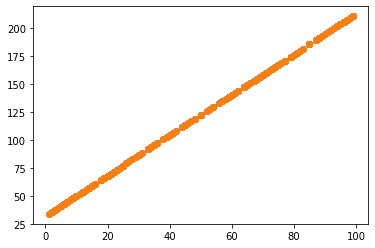

165000, w =  1.800000, b =  31.999978


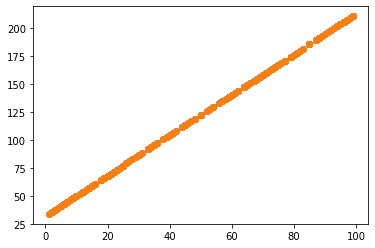

166000, w =  1.800000, b =  31.999980


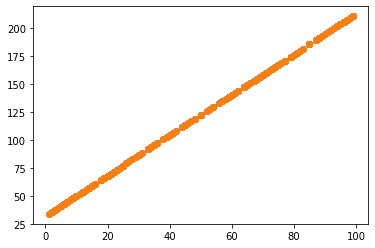

167000, w =  1.800000, b =  31.999982


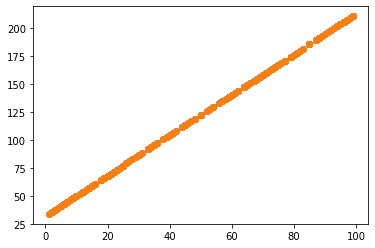

168000, w =  1.800000, b =  31.999983


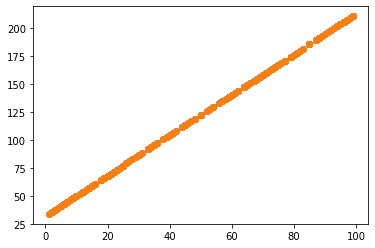

169000, w =  1.800000, b =  31.999985


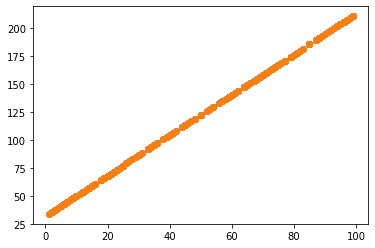

170000, w =  1.800000, b =  31.999986


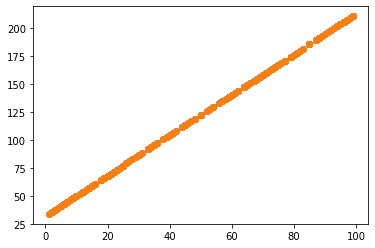

171000, w =  1.800000, b =  31.999987


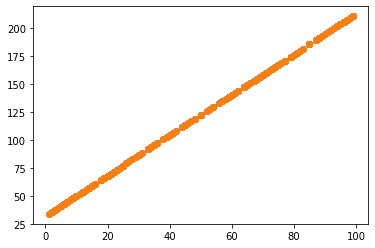

172000, w =  1.800000, b =  31.999988


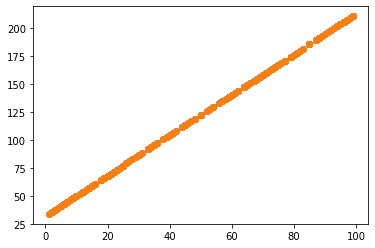

173000, w =  1.800000, b =  31.999989


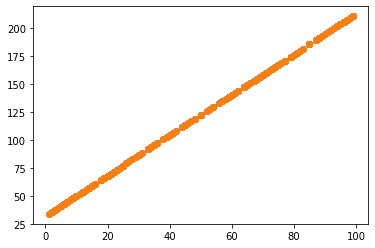

174000, w =  1.800000, b =  31.999990


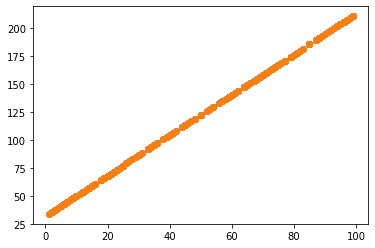

175000, w =  1.800000, b =  31.999991


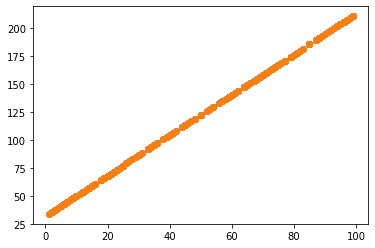

176000, w =  1.800000, b =  31.999992


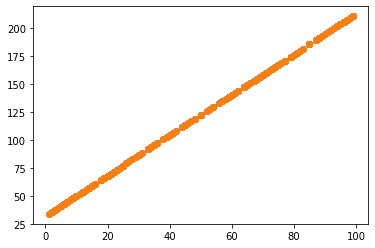

177000, w =  1.800000, b =  31.999992


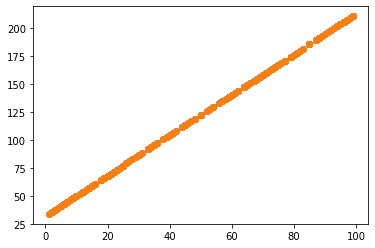

178000, w =  1.800000, b =  31.999993


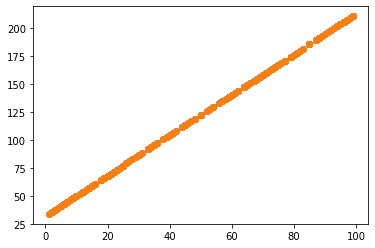

179000, w =  1.800000, b =  31.999993


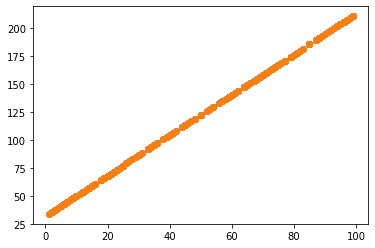

180000, w =  1.800000, b =  31.999994


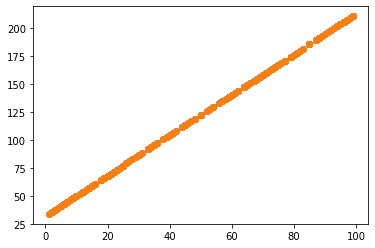

181000, w =  1.800000, b =  31.999995


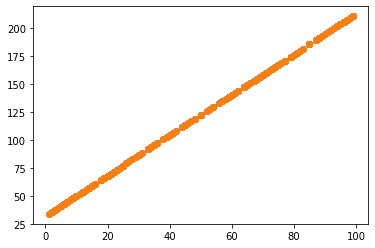

182000, w =  1.800000, b =  31.999995


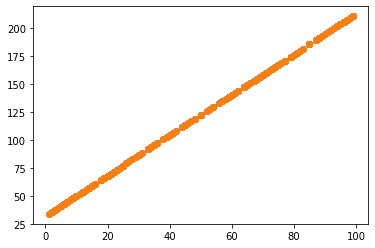

183000, w =  1.800000, b =  31.999995


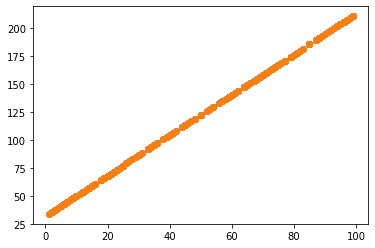

184000, w =  1.800000, b =  31.999996


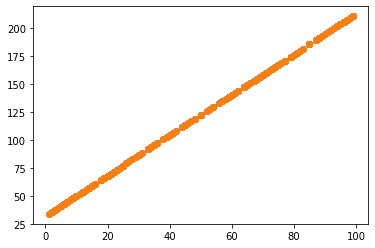

185000, w =  1.800000, b =  31.999996


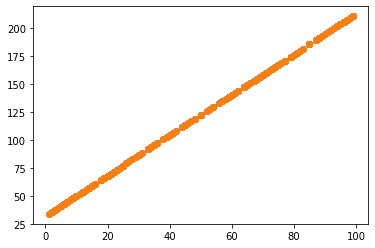

186000, w =  1.800000, b =  31.999996


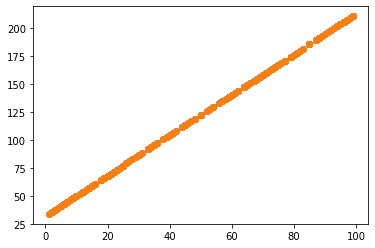

187000, w =  1.800000, b =  31.999997


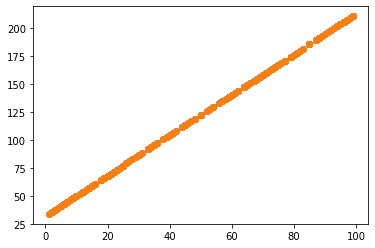

188000, w =  1.800000, b =  31.999997


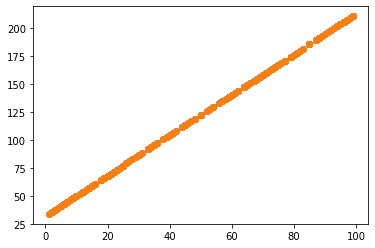

189000, w =  1.800000, b =  31.999997


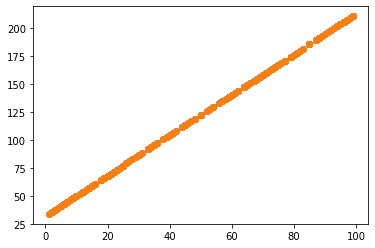

190000, w =  1.800000, b =  31.999997


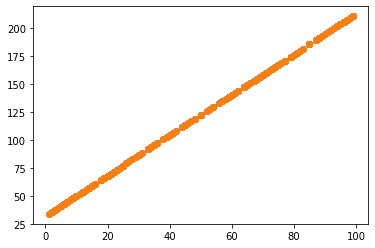

191000, w =  1.800000, b =  31.999998


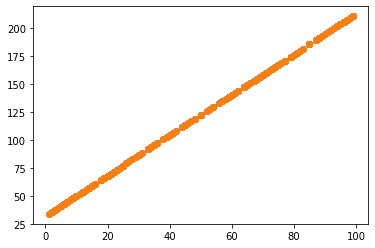

192000, w =  1.800000, b =  31.999998


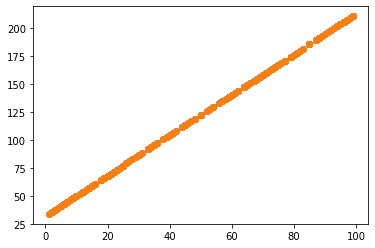

193000, w =  1.800000, b =  31.999998


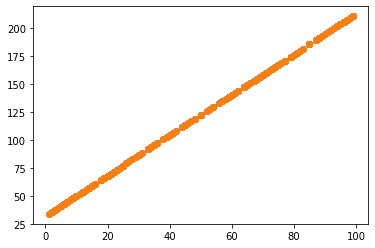

194000, w =  1.800000, b =  31.999998


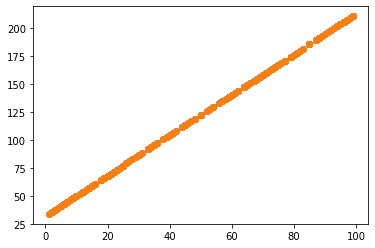

195000, w =  1.800000, b =  31.999998


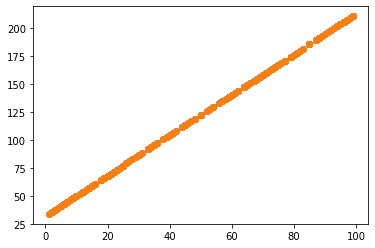

196000, w =  1.800000, b =  31.999998


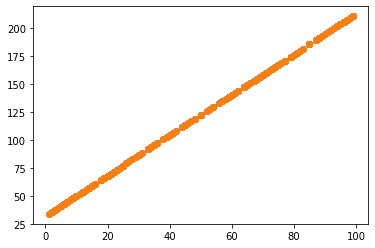

197000, w =  1.800000, b =  31.999999


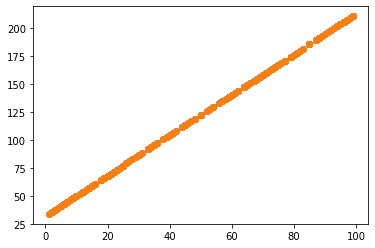

198000, w =  1.800000, b =  31.999999


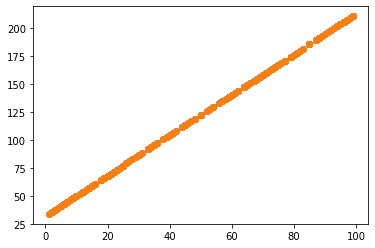

199000, w =  1.800000, b =  31.999999


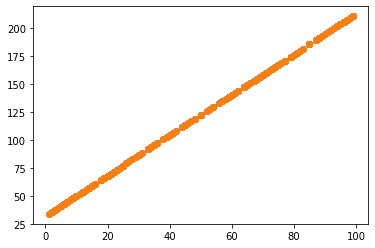

In [69]:
epoch = 200000
learning_rate = 0.0003

# y = X * w + b
w = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)

for e in range(epoch):
    y_predict = X * w + b
    
    w = w - learning_rate * ((y_predict - y) * X).mean()     ### gdW : update gradient
    b = b - learning_rate * (y_predict - y).mean()           ### gdb : gradient discent b
    
    if e % 1000 == 0:
#         plt.scatter(C, F)
#         plt.plot(X, y_predict, c='r')
        print(f"{e}, w = {w: .6f}, b = {b: .6f}")
        plot_prediction(y_predict, y)

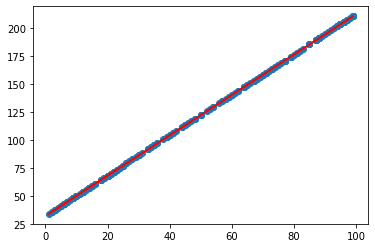

In [70]:
plt.scatter(C, F)
plt.plot(X, y_predict, c='r')

#### 방법 2 : tensorflow 활용

In [84]:
### Anaconda Prompt 관리자 권한 실행
# conda update -n base conda
# conda update --all
# conda install tensorflow
# 또는
# !pip install tensorflow

In [122]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5851944907280985284
 xla_global_id: -1]

In [124]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7026780326040787152
 xla_global_id: -1]

In [125]:
import tensorflow as tf
tf.__version__

AttributeError: module 'tensorflow' has no attribute '__version__'

In [119]:
import tensorflow as tf

# Check for tensorflow GPU acess
print("TensorFlow has access to the following devices:", tf.config.list_physical_devices())

# See TensorFlow version
print("TensorFlow version:", tf.__version__)

AttributeError: module 'tensorflow' has no attribute 'config'

In [89]:
import tensorflow as tf
tf.disable_v2_behavior()

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy
 
def x_norm(x): # x값을 Normalization (이유: 학습을 빠르게 하고 학습과정 중 발산(양 또는 음의 무한대)을 피하기 위함)
    x = numpy.array(x) # 리스트형태, 스칼라형태 관계없이 처리하기 위해 변환
    x = x / 100 * 0.99 + 0.01
    return x
 
# (요소값 - 최소값) / (최대값 - 최소값) * 0.99 + 0.01
# 최소값 0, 최대값 100 가정
 
 
# 섭씨와 화씨를 관찰하여 입력한다.
# 12.0 -> 53.6
# 28.0 -> 82.4
# 36.5 -> 97.7
# 42.0 -> 107.6
# 29.8 -> 85.64
# 섭씨를 입력하면 화씨로 변환하고자 한다.
# 답을 살짝 알려주면 F = 1.8 * C + 32 이다.
 
x = [12.0, 28.0, 36.5, 42.0, 29.8] # 섭씨(C) 입력
x = x_norm(x)
 
y = [53.6, 82.4, 97.7, 107.6, 85.64] # 화씨(F) 출력(=Target)
 
 
# random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)
# minval ~ maxval 사이의 숫자를 균등분포로 랜덤하게 생성한다.
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="Weight")  # 가중치(Weight) 변수
print(W)
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="Bias")  # 편향(Bias) 변수
print(b)
 
 
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")
 
 
hypothesis = tf.add( tf.multiply(W, X), b )  # 여기서 입력 값 1개와 가중치 1개씩 트레이닝에 이용되므로 요소간 곱셉 이용
# hypothesis = W * X + b   # 위 표현식과 정확히 같다.
# tf.multiply는 요소간 곱셉이다.
# tf.matmul는 행렬 곱셈이다. 즉 내적(dot product)으로 그 차이점을 잘 알아두어야 한다.
# tf.matmul로 바꾸면 "Shape must be rank 2" 오류가 발생한다. 실제 W는 [1]으로 rank 1이므로 사용하지 못한다.
# 2개 이상의 Feature를 이용한 경우부터 사용가능하다.
print(hypothesis)
 
 
 
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.3)  # 경사하강법(Gradient Descent) 사용
cost = tf.reduce_mean( tf.square(Y - hypothesis))                   # 실제값에서 가정값의 차이에 제곱한 값들의 평균값을 비용으로 정의
train_op = optimizer.minimize(cost)                                 # 비용(=오류총합)를 최소화하도록 최적화
 
 
 
with tf.Session() as sess: # 세션 블록 생성
    sess.run(tf.global_variables_initializer())
    
    print(sess.run(W), sess.run(b))
    
    for step in range(10000):
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x, Y: y})
        
        print("Step: ", step, "  Cost: ", cost_val, "  W: ", sess.run(W), "  b: ", sess.run(b))
        
    print("X: 20, Y:", sess.run(hypothesis, feed_dict={X: x_norm(20)}))
    print("X: 30, Y:", sess.run(hypothesis, feed_dict={X: x_norm(30)}))
    print("X: 40, Y:", sess.run(hypothesis, feed_dict={X: x_norm(40)}))
    print("X: 50, Y:", sess.run(hypothesis, feed_dict={X: x_norm(50)}))
    print("X: 60, Y:", sess.run(hypothesis, feed_dict={X: x_norm(60)}))

## Logistic Regression(로지스틱 회귀)

- Linear Regression 알고리즘은 Regression 문제만 풀 수 있음 : 연속값에 대한 예측이기 때문
- Logistic Regression : Regression 접근방법을 Classification 에 적용하기 위한 알고리즘


** ------------------------------------------------- **
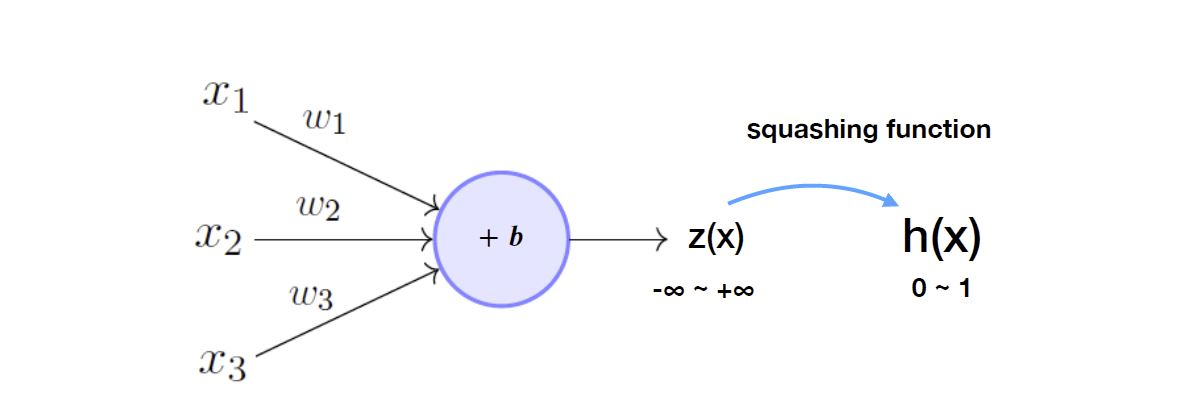
> 연속값으로 나오는 결과(z) 를 0~1 사이로 변환(Squashing) 하게 함수(h)를 사용하면 적용 가능할 것이다는 알고리즘

** ------------------------------------------------- **
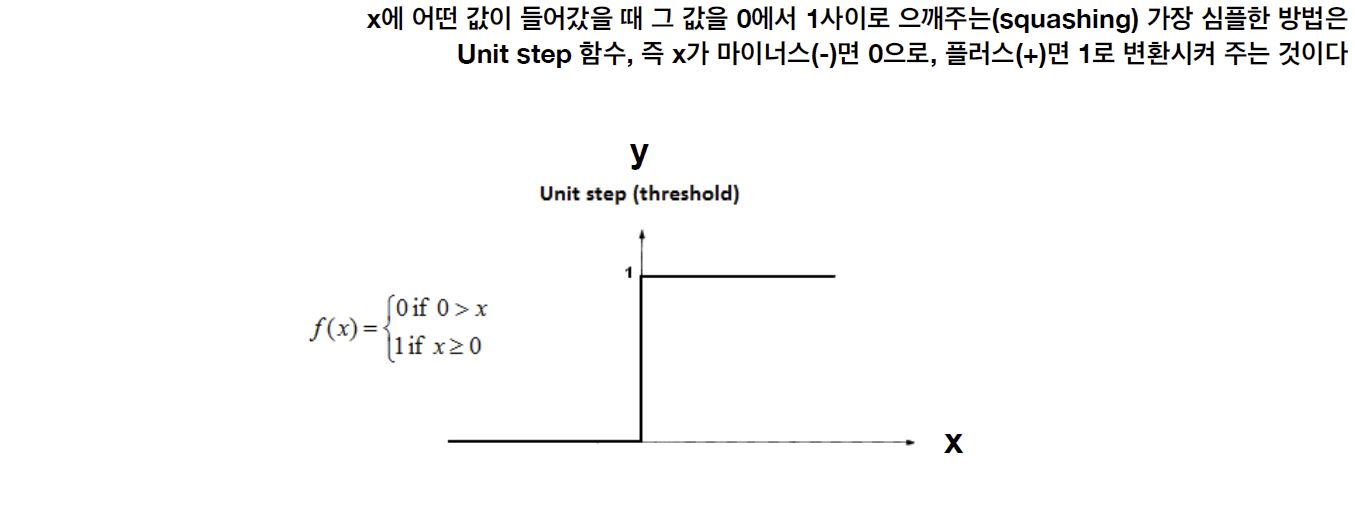
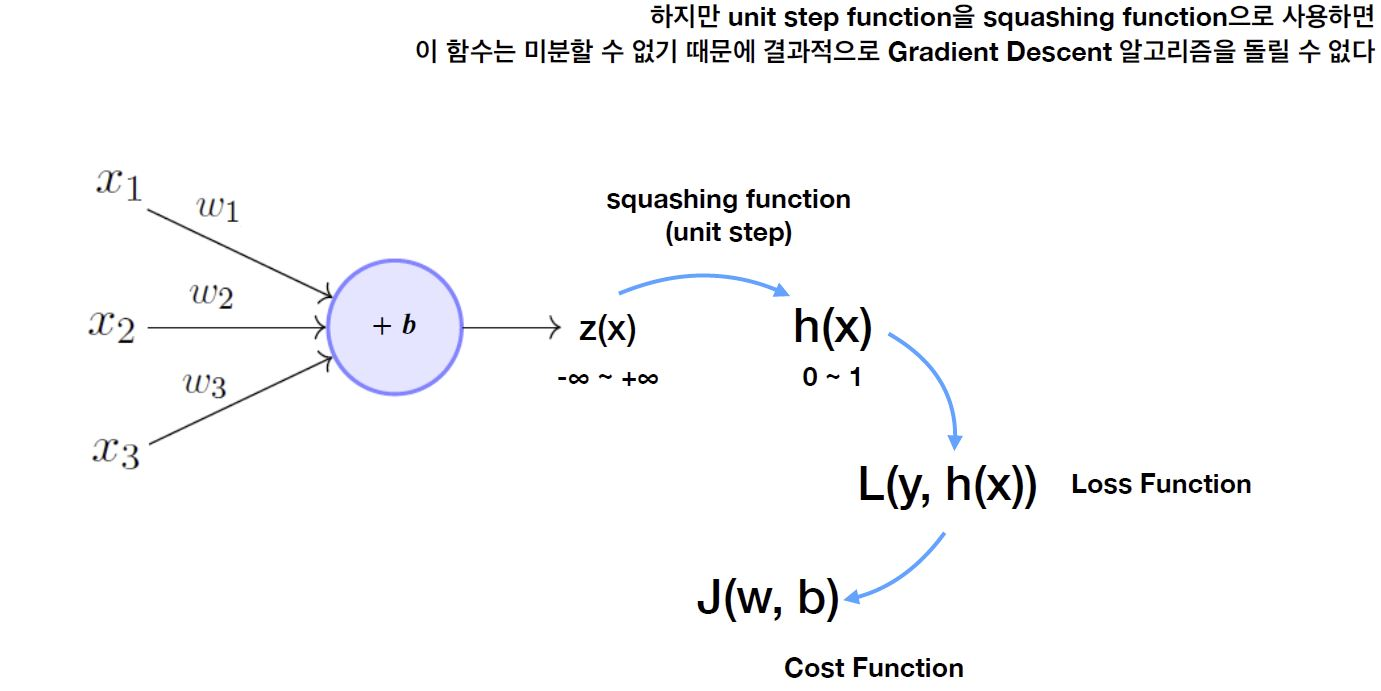
** ------------------------------------------------- **
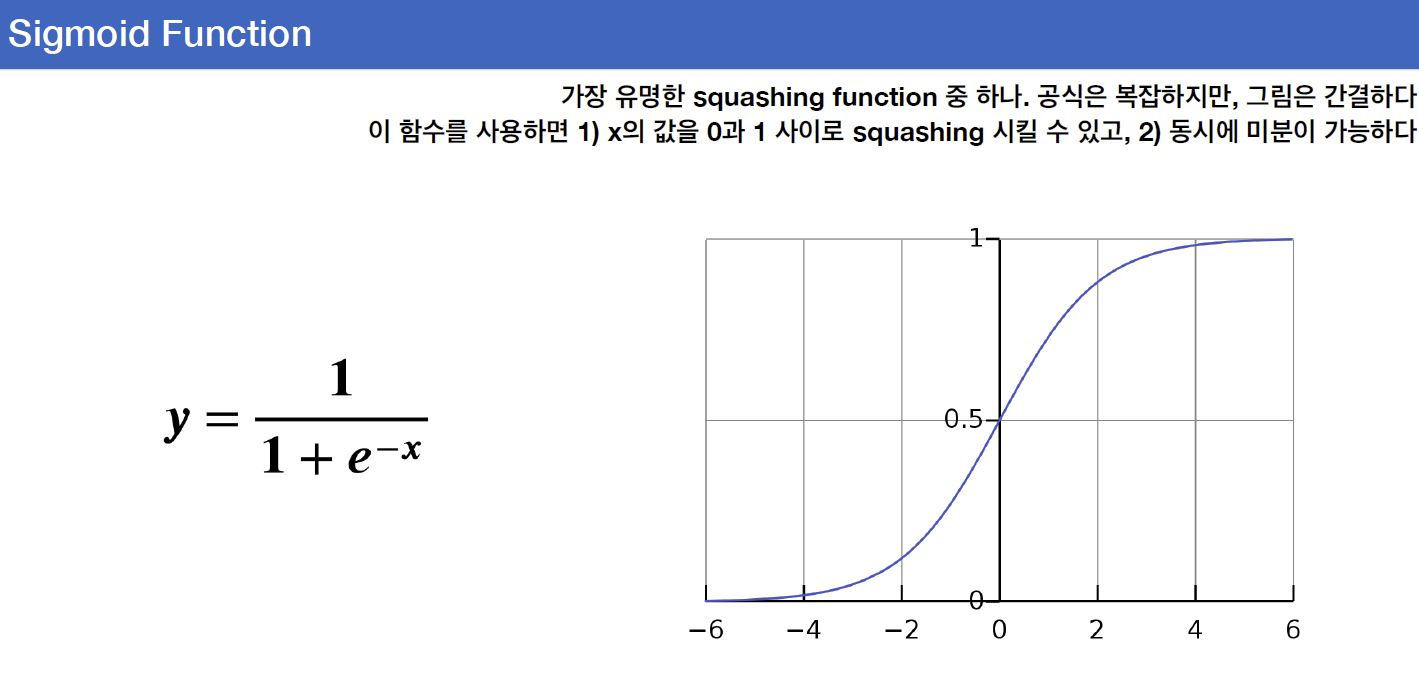
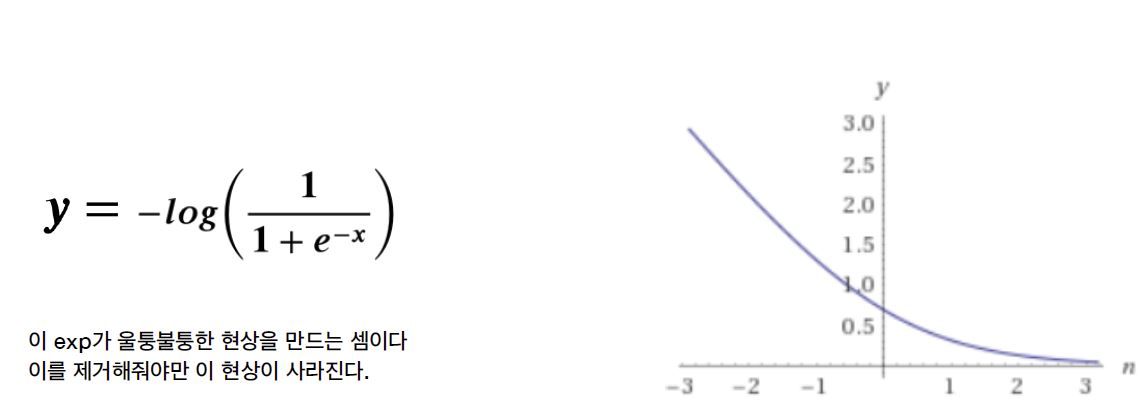
** ------------------------------------------------- **
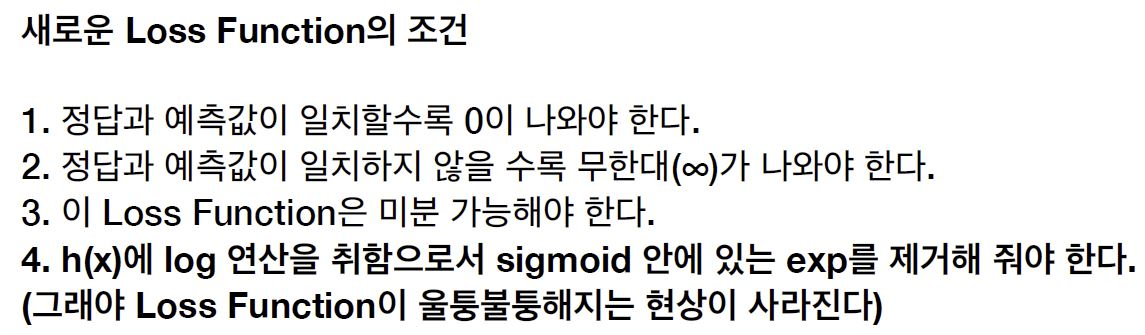